---
# Econometric Group Project


---

In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import seaborn as sns
from matplotlib import pyplot as plt

---
## Part 1: Monte Carllo Analysis

### Explaining the Code
For this part we rewrote the code provided in the moodle in `python` in a way that makes us able to run experiments and change the hyperparameters as we wish. The code is in `Code/project/monte_carlo.py` and can be accessed with the following command:

```python
from project import monte_carlo
```
Here we use the `run_multi_monte_carlo` function. It takes the list of hyperparameters as input and run the monte carlo code (`run_single_monte_carlo`) for each possible setup of the model and then returns the desired results as a `DataFrame` object, which we will use in this section to make our analysis.

In order to campare the result of the monte carlo model on different setups, we propuse a variety of metrices and used them as the objective of our analysis.
* `true_mse`: $$\frac{1}{n}\sum_{i=1}^{n}{\left[y_i - \sum_{k=1}^{p}\left(\beta_k x_{ik}\right)\right]^2}$$
* `true_mae`: $$\frac{1}{n}\sum_{i=1}^{n}{\left|y_i - \sum_{k=1}^{p}\left(\beta_k x_{ik}\right)\right|}$$
* `true_r2`: $$\mathcal{R}^2\left(y, X \beta\right)$$
* `ols_mse`: $$\frac{1}{n}\sum_{i=1}^{n}{\left[y_i - \sum_{k=1}^{p}\left(\hat{\beta}^{(ols)}_k x_{ik}\right)\right]^2}$$
* `ols_mae`: $$\frac{1}{n}\sum_{i=1}^{n}{\left|y_i - \sum_{k=1}^{p}\left(\hat{\beta}^{(ols)}_k x_{ik}\right)\right|}$$
* `ols_r2`: $$\mathcal{R}^2\left(y,  X \hat{\beta}^{(ols)}\right)$$
* `bias_mse`: $$\frac{1}{n}\sum_{i=1}^{n}{\left[y_i - \sum_{k=1}^{p}\left(\hat{\beta}^{(bias)}_k x_{ik}\right)\right]^2}$$
* `bias_mae`: $$\frac{1}{n}\sum_{i=1}^{n}{\left|y_i - \sum_{k=1}^{p}\left(\hat{\beta}^{(bias)}_k x_{ik}\right)\right|}$$
* `bias_r2`: $$\mathcal{R}^2\left(y,  X \hat{\beta}^{(bias)}\right)$$
* `ols_mse_diff`: $$\frac{1}{p}\sum_{i=1}^{p}{\left[\beta_i - \hat{\beta}^{(ols)}_i \right]^2}$$
* `bias_mse_diff`: $$\frac{1}{p_{omit}}\sum_{i=1}^{p_{omit}}{\left[\beta_i - \hat{\beta}^{(bias)}_i \right]^2}$$
* `ols_mse_diff`: $$\frac{1}{p}\sum_{i=1}^{p}{\left(\frac{\beta_i - \hat{\beta}^{(ols)}_i}{\beta_i} \right)}$$
* `bias_mse_diff`: $$\frac{1}{p_{omit}}\sum_{i=1}^{p_{omit}}{\left(\frac{\beta_i - \hat{\beta}^{(bias)}_i}{\beta_i} \right)}$$

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from project.monte_carlo import run_multi_monte_carlo


plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.linestyle'] = 'dotted'
plt.rcParams['figure.figsize'] = (8, 4)

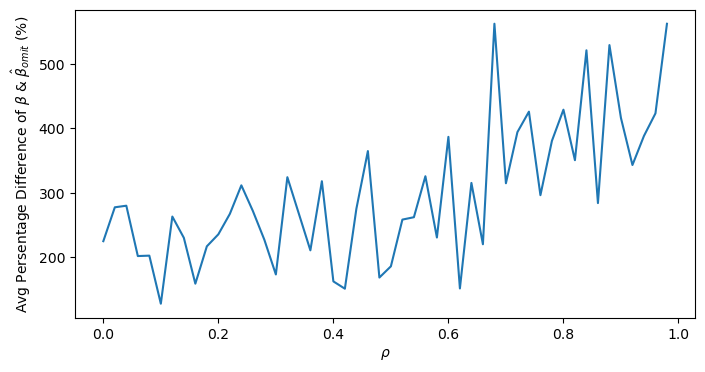

In [5]:
# result_df = run_multi_monte_carlo(
#     nMC = [10_000],
#     n = [500],
#     p = [5],
#     rho = np.arange(0, 1, 0.02),
#     sigma2 = [1],
#     n_omit = [1]
# )

sns.lineplot(data=result_df, x='rho', y='bias_percent_diff')
plt.ylabel('Avg Persentage Difference of $\\beta$ & $\\hat{\\beta}_{omit}$ (%)')
plt.xlabel('$\\rho$')
plt.savefig('../Plots/1_mc_bpd_rho.pdf', bbox_inches='tight')

Text(0.5, 0, '$\\rho$')

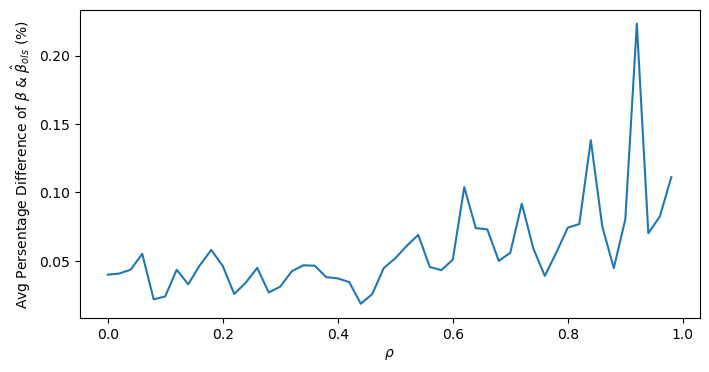

In [6]:
# result_df = run_multi_monte_carlo(
#     nMC = [200],
#     n = [500],
#     p = [5],
#     rho = np.arange(0, 1, 0.05),
#     sigma2 = [1],
#     n_omit = [1]
# )

sns.lineplot(data=result_df, x='rho', y='ols_percent_diff')
plt.ylabel('Avg Persentage Difference of $\\beta$ & $\\hat{\\beta}_{ols}$ (%)')
plt.xlabel('$\\rho$')
# plt.savefig('../Plots/1_01_ols_rho.pdf', bbox_inches='tight')

100%|██████████| 20/20 [00:03<00:00,  5.02it/s]


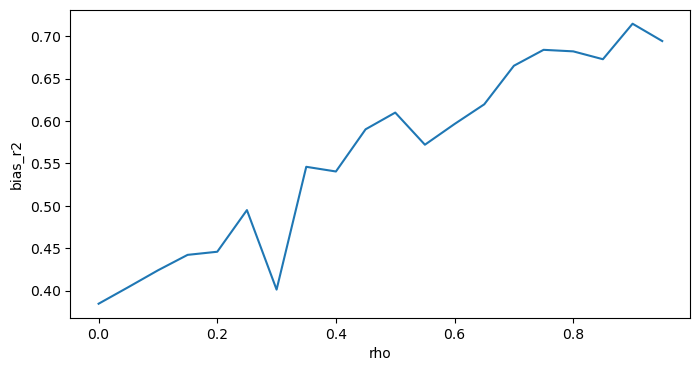

In [5]:
result_df = run_multi_monte_carlo(
    nMC = [1000],
    n = [500],
    p = [2],
    rho = np.arange(0, 1, 0.05),
    sigma2 = [1],
    n_omit = [1],
    beta_l=[1, 0.7]
)
sns.lineplot(data=result_df, x='rho', y='bias_r2')
plt.show()

In [ ]:
result_df = run_multi_monte_carlo(
    nMC = [10_000],
    n = [500],
    p = np.arange(2, 100, 1),
    rho = [0.5],
    sigma2 = [1],
    n_omit = [1],
    beta_l=[1, 0.7]
)
sns.lineplot(data=result_df, x='p', y='bias_percent_diff')
plt.show()

In [ ]:
result_df = run_multi_monte_carlo(
    nMC = [5_000],
    n = [100],
    p = [3],
    rho = [0.2],
    sigma2 = np.arange(0, 100, 1),
    n_omit = [1]
)

sns.lineplot(data=result_df, x='sigma2', y='bias_percent_diff', )
plt.show()

In [ ]:
result_df = run_multi_monte_carlo(
    nMC = [10_000],
    n = range(100, 1000, 10),
    p = [3],
    rho = [0.5],
    sigma2 = [1.0],
    n_omit = [1]
)

sns.lineplot(data=result_df, x='n', y='bias_percent_diff', )
plt.show()

---
## Part 2: Data Generating Process

In this part, we implimented a class of data generating process called `DGP` that takes create a data generating process with desired features. The code for this class is accessable in `Coda/project/data_generating_process.py` and the class can be used by the following command:
```python
from project.data_generating_process import DGP
```
In order to create the DGP, we need to specify few variables:
- `n_covariate`: number of variable in our model (default value: `100`) 
- `err_variance`: [$\sigma^2$] varaince of the regression model  (default value: `1.0`) 
- `rho`: [$\rho$] the correlation parameter of the model (default value: `0.9`)
- `n_relevant`: number of variables with a coefficient not equal to zero (default value: `3`) 
- `coef_list`: list of $\beta$ to use in the model. If not specified, $\beta$ would generate randomly (default value: `[]`)
- `rand_interval`: lower and upper bound for genrating random $\beta$ (default value: `(-5, 5)`)

It is important to note that in generating the third DGP, our model operates a bit different from the fomula in the instruction. There the AR formula is specified as:
$$x_{it} = \rho x_{it-1} + 0.5 u_t \quad u_t \sim\mathcal{N}(0, 1)$$
which means the noise is produced once for each observation. This means that we can re-write the fomula as:
$$x_{it} = \rho^{t-1} x_1 + u_t \sum_{j=0}^{t-2}\rho^j$$
Therefore, instead of using the formula from the instruction, we used the following formula to generate our datasets. The only difference is that the random noise is generated in every single step of the data generating process.
$$x_{it} = \rho x_{it-1} + 0.5 u_{it} \quad u_{it} \sim\mathcal{N}(0, 1)$$


---
## Part 3: Information Theoric Model Average

$$\pi_i = \frac{\exp{(BIC_i)}}{\sum \exp{(BIC_k)}}$$

$$\omega_i = \frac{\exp{(-\frac{1}{2}\Psi_i)}}{\sum \exp{(-\frac{1}{2}\Psi_k)}} \quad\quad \Psi_i = BCI_i - \min_j{\{BCI_j\}}$$


In [1]:
from project.monte_carlo import MC_Datasets
from project.information_theoric_model import InfoTheoricModelAVG

In [2]:
mc_dataset = MC_Datasets(show_progress=True, n_iter=100)
mc_dataset.create_datasets(beta=[-5, 3, 2])

In [11]:
info_avg_model = InfoTheoricModelAVG(mc_dataset=mc_dataset)
best_model, true_cmb_model, var_prob = info_avg_model.MC_get_best_models(metric = 'BIC')

100%|██████████| 100/100 [00:58<00:00,  1.72it/s]


In [12]:
print(best_model)

  Dataset Combination         AIC         BIC        R2    Adj_R2      prob
0    DGP1  1110000000  292.149038  305.342308  0.993286  0.993387  0.410158
1    DGP2  1110000000  291.057061  304.250330  0.989392  0.989552  0.382319
2    DGP3  1110000000  287.292780  300.486050  0.982368  0.982634  0.399596


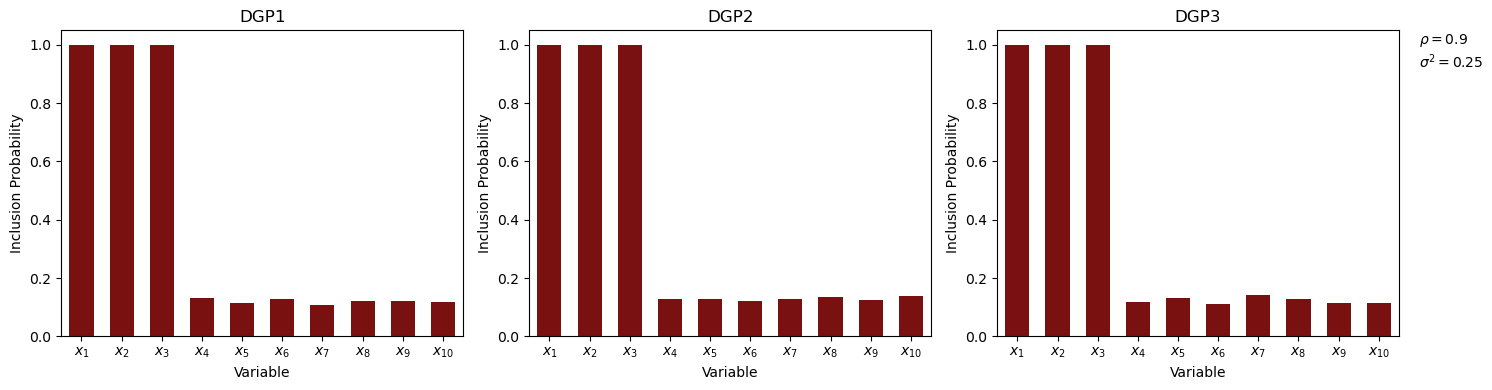

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

for dataset, ax in zip(['DGP1', 'DGP2', 'DGP3'], axs.flatten()):
    df = var_prob[var_prob['Dataset'] == dataset]
    x = [('$' + v[:2] + '{' + v[2:] + '}$') for v in df['var']]
    y = df['prob']
    sns.barplot(x = x, y = y, color='darkred', width=0.6, ax=ax)
    ax.set_xlabel('Variable')
    ax.set_ylabel('Inclusion Probability')
    ax.set_title(dataset)

plt.text(x = 10, y = 0.92,s ='$\\rho=0.9$\n$\\sigma^2=0.25$')
fig.tight_layout()
plt.savefig('../Plots/3_inclusion_prob_rho0-9_var0-25.pdf', bbox_inches='tight')

100%|██████████| 100/100 [00:45<00:00,  2.18it/s]


  Dataset Combination         AIC         BIC        R2    Adj_R2      prob
0    DGP1  1110000000  292.149038  305.342308  0.993286  0.993387  0.410158
1    DGP2  1110000000  291.057061  304.250330  0.989392  0.989552  0.382319
2    DGP3  1110000000  287.292780  300.486050  0.982368  0.982634  0.399596


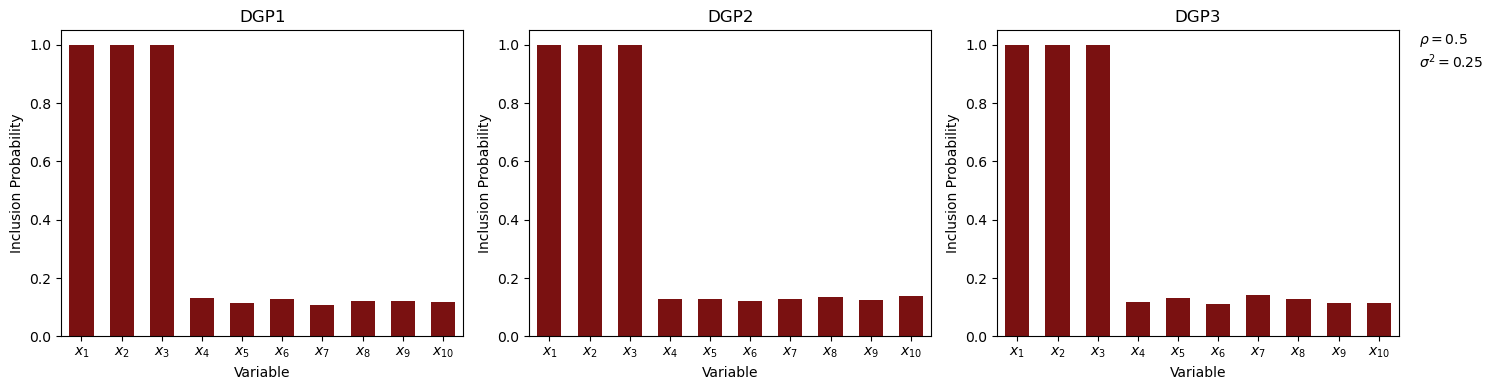

In [10]:
mc_dataset = MC_Datasets(show_progress=True, n_iter=100)
mc_dataset.create_datasets(beta=[-5, 3, 2], rho=0.5)

info_avg_model = InfoTheoricModelAVG(mc_dataset=mc_dataset)
best_model, true_cmb_model, var_prob = info_avg_model.MC_get_best_models(metric = 'BIC')

print(best_model)


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

for dataset, ax in zip(['DGP1', 'DGP2', 'DGP3'], axs.flatten()):
    df = var_prob[var_prob['Dataset'] == dataset]
    x = [('$' + v[:2] + '{' + v[2:] + '}$') for v in df['var']]
    y = df['prob']
    sns.barplot(x = x, y = y, color='darkred', width=0.6, ax=ax)
    ax.set_xlabel('Variable')
    ax.set_ylabel('Inclusion Probability')
    ax.set_title(dataset)

plt.text(x = 10, y = 0.92,s ='$\\rho=0.5$\n$\\sigma^2=0.25$')
fig.tight_layout()
plt.savefig('../Plots/3_inclusion_prob_rho0-5_var0-25.pdf', bbox_inches='tight')

  Dataset Combination          AIC          BIC        R2    Adj_R2      prob
0    DGP1  1110000000  1210.181333  1223.374602  0.600881  0.606898  0.406465
1    DGP2  1110000000  1207.857188  1221.050457  0.310036  0.320437  0.269892
2    DGP3  1110000000  1205.542727  1218.735997  0.244052  0.255448  0.182791


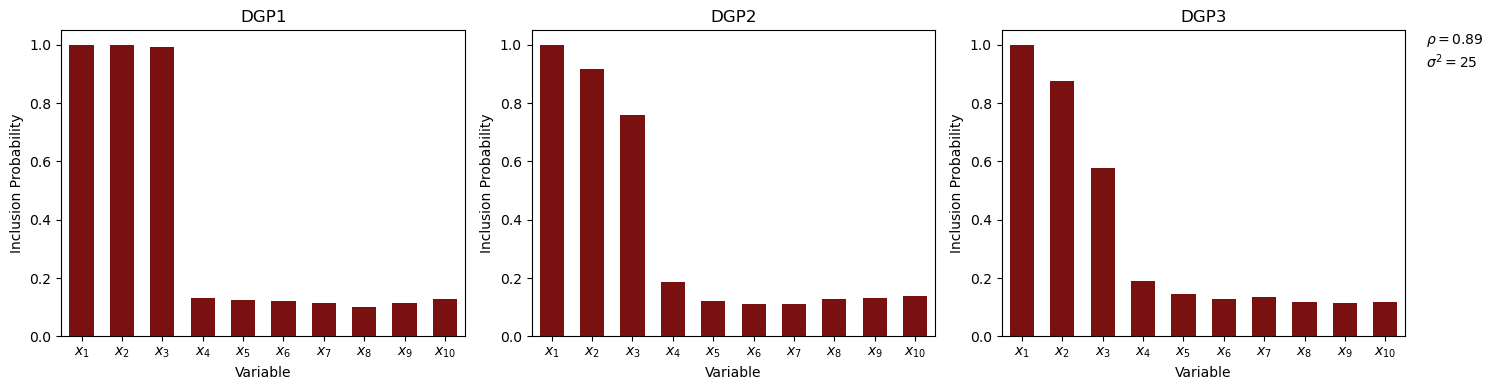

In [9]:
mc_dataset = MC_Datasets(show_progress=True, n_iter=100)
mc_dataset.create_datasets(beta=[-5, 3, 2], rho=0.8, err_variance=25)

info_avg_model = InfoTheoricModelAVG(mc_dataset=mc_dataset)
best_model, true_cmb_model, var_prob = info_avg_model.MC_get_best_models(metric = 'BIC')

print(best_model)


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

for dataset, ax in zip(['DGP1', 'DGP2', 'DGP3'], axs.flatten()):
    df = var_prob[var_prob['Dataset'] == dataset]
    x = [('$' + v[:2] + '{' + v[2:] + '}$') for v in df['var']]
    y = df['prob']
    sns.barplot(x = x, y = y, color='darkred', width=0.6, ax=ax)
    ax.set_xlabel('Variable')
    ax.set_ylabel('Inclusion Probability')
    ax.set_title(dataset)

plt.text(x = 10, y = 0.92,s ='$\\rho=0.8$\n$\\sigma^2=25$')
fig.tight_layout()
plt.savefig('../Plots/3_inclusion_prob_rho0-8_var25.pdf', bbox_inches='tight')

In [ ]:
mc_dataset = MC_Datasets(show_progress=True, n_iter=100)
mc_dataset.create_datasets(beta=[-5, 3, 2], rho=0.8, err_variance=25)

info_avg_model = InfoTheoricModelAVG(mc_dataset=mc_dataset)
best_model, true_cmb_model, var_prob = info_avg_model.MC_get_best_models(metric = 'BIC')

print(best_model)


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

for dataset, ax in zip(['DGP1', 'DGP2', 'DGP3'], axs.flatten()):
    df = var_prob[var_prob['Dataset'] == dataset]
    x = [('$' + v[:2] + '{' + v[2:] + '}$') for v in df['var']]
    y = df['prob']
    sns.barplot(x = x, y = y, color='darkred', width=0.6, ax=ax)
    ax.set_xlabel('Variable')
    ax.set_ylabel('Inclusion Probability')
    ax.set_title(dataset)

plt.text(x = 10, y = 0.92,s ='$\\rho=0.89$\n$\\sigma^2=25$')
fig.tight_layout()
plt.savefig('../Plots/3_inclusion_prob_rho0-8_var25.pdf', bbox_inches='tight')

### Check how would the result be affected by the hyperparemeters

In [43]:
true_res_df = pd.read_csv('../Data/ITMA_true.csv', index_col=0)
prob_res_df = pd.read_csv('../Data/ITMA_prob.csv', index_col=0)
best_res_df = pd.read_csv('../Data/ITMA_best.csv', index_col=0)

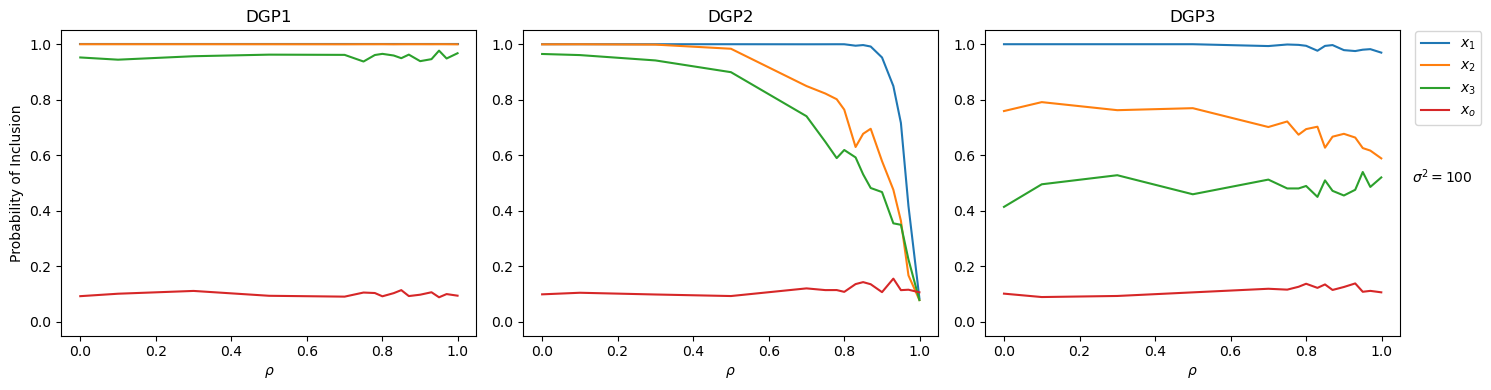

In [45]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (15, 4))


df = prob_res_df[(prob_res_df['sigma'] == 100)].copy()
df['plt_var'] = [('$x_{o}$' if s not in ('x_1', 'x_2', 'x_3') else ('$x_{' + s[-1] + '}$')) for s in df['var']]
df = df.groupby(['Dataset', 'rho', 'plt_var'])['prob'].agg('max').reset_index()


sns.lineplot(data=df[df['Dataset'] == 'DGP1'], x='rho', y='prob', hue='plt_var', ax=axs[0])
sns.lineplot(data=df[df['Dataset'] == 'DGP2'], x='rho', y='prob', hue='plt_var', ax=axs[1])
sns.lineplot(data=df[df['Dataset'] == 'DGP3'], x='rho', y='prob', hue='plt_var', ax=axs[2])

axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].legend(title='', bbox_to_anchor=(1.02, 1.02))

axs[0].set_ylabel('Probability of Inclusion')
axs[1].set_ylabel('')
axs[2].set_ylabel('')

axs[0].set_xlabel('$\\rho$')
axs[1].set_xlabel('$\\rho$')
axs[2].set_xlabel('$\\rho$')


axs[0].set_title('DGP1')
axs[1].set_title('DGP2')
axs[2].set_title('DGP3')


axs[0].set_ylim((-0.05, 1.05))
axs[1].set_ylim((-0.05, 1.05))
axs[2].set_ylim((-0.05, 1.05))

axs[2].text(1.08, 0.5, '$\\sigma^2 = 100$')
fig.tight_layout()

plt.savefig('../Plots/3_inclusion_prob_rho_s100.pdf')

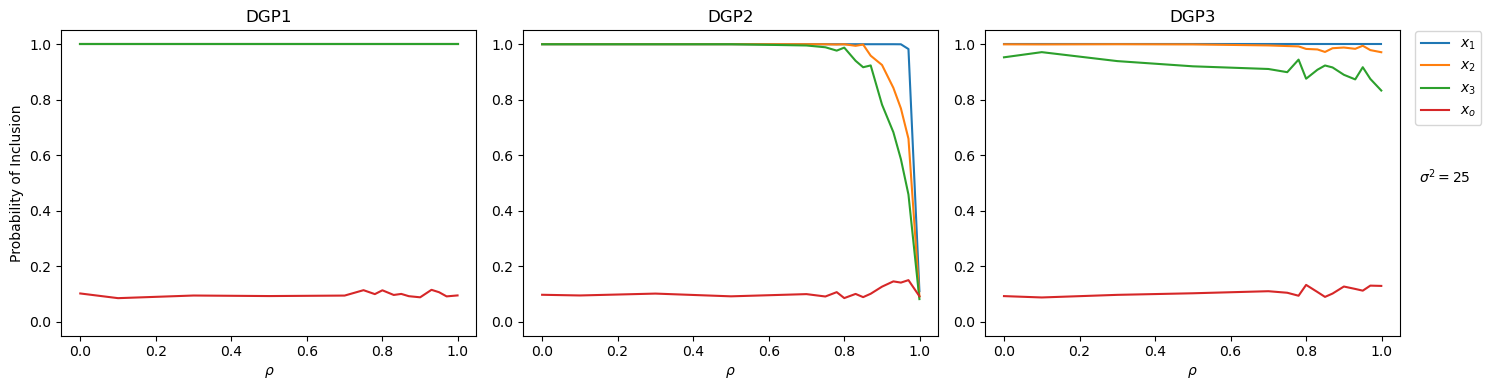

In [58]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (15, 4))


df = prob_res_df[(prob_res_df['sigma'] == 25)].copy()
df['plt_var'] = [('$x_{o}$' if s not in ('x_1', 'x_2', 'x_3') else ('$x_{' + s[-1] + '}$')) for s in df['var']]
df = df.groupby(['Dataset', 'rho', 'plt_var'])['prob'].agg('max').reset_index()


sns.lineplot(data=df[df['Dataset'] == 'DGP1'], x='rho', y='prob', hue='plt_var', ax=axs[0])
sns.lineplot(data=df[df['Dataset'] == 'DGP2'], x='rho', y='prob', hue='plt_var', ax=axs[1])
sns.lineplot(data=df[df['Dataset'] == 'DGP3'], x='rho', y='prob', hue='plt_var', ax=axs[2])

axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].legend(title='', bbox_to_anchor=(1.02, 1.02))

axs[0].set_ylabel('Probability of Inclusion')
axs[1].set_ylabel('')
axs[2].set_ylabel('')

axs[0].set_xlabel('$\\rho$')
axs[1].set_xlabel('$\\rho$')
axs[2].set_xlabel('$\\rho$')


axs[0].set_title('DGP1')
axs[1].set_title('DGP2')
axs[2].set_title('DGP3')

axs[0].set_ylim((-0.05, 1.05))
axs[1].set_ylim((-0.05, 1.05))
axs[2].set_ylim((-0.05, 1.05))


axs[2].text(1.1, 0.5, '$\\sigma^2 = 25$')
fig.tight_layout()

plt.savefig('../Plots/3_inclusion_prob_rho_s25.pdf')

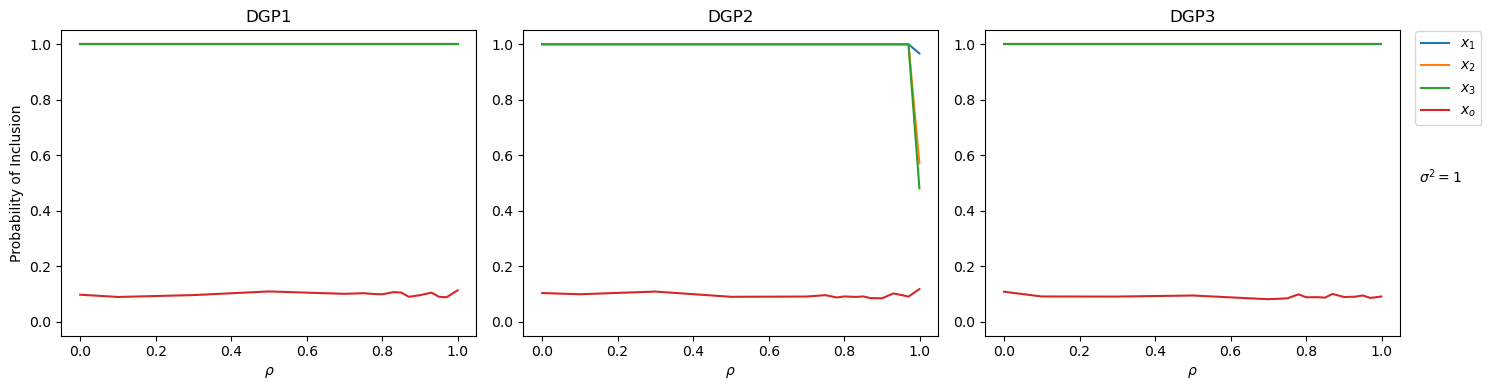

In [78]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (15, 4))


df = prob_res_df[(prob_res_df['sigma'] == 1)].copy()
df['plt_var'] = [('$x_{o}$' if s not in ('x_1', 'x_2', 'x_3') else ('$x_{' + s[-1] + '}$')) for s in df['var']]
df = df.groupby(['Dataset', 'rho', 'plt_var'])['prob'].agg('max').reset_index()


sns.lineplot(data=df[df['Dataset'] == 'DGP1'], x='rho', y='prob', hue='plt_var', ax=axs[0])
sns.lineplot(data=df[df['Dataset'] == 'DGP2'], x='rho', y='prob', hue='plt_var', ax=axs[1])
sns.lineplot(data=df[df['Dataset'] == 'DGP3'], x='rho', y='prob', hue='plt_var', ax=axs[2])

axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].legend(title='', bbox_to_anchor=(1.02, 1.02))

axs[0].set_ylabel('Probability of Inclusion')
axs[1].set_ylabel('')
axs[2].set_ylabel('')

axs[0].set_xlabel('$\\rho$')
axs[1].set_xlabel('$\\rho$')
axs[2].set_xlabel('$\\rho$')


axs[0].set_title('DGP1')
axs[1].set_title('DGP2')
axs[2].set_title('DGP3')

axs[0].set_ylim((-0.05, 1.05))
axs[1].set_ylim((-0.05, 1.05))
axs[2].set_ylim((-0.05, 1.05))


axs[2].text(1.1, 0.5, '$\\sigma^2 = 1$')
fig.tight_layout()

plt.savefig('../Plots/3_inclusion_prob_rho_s1.pdf')

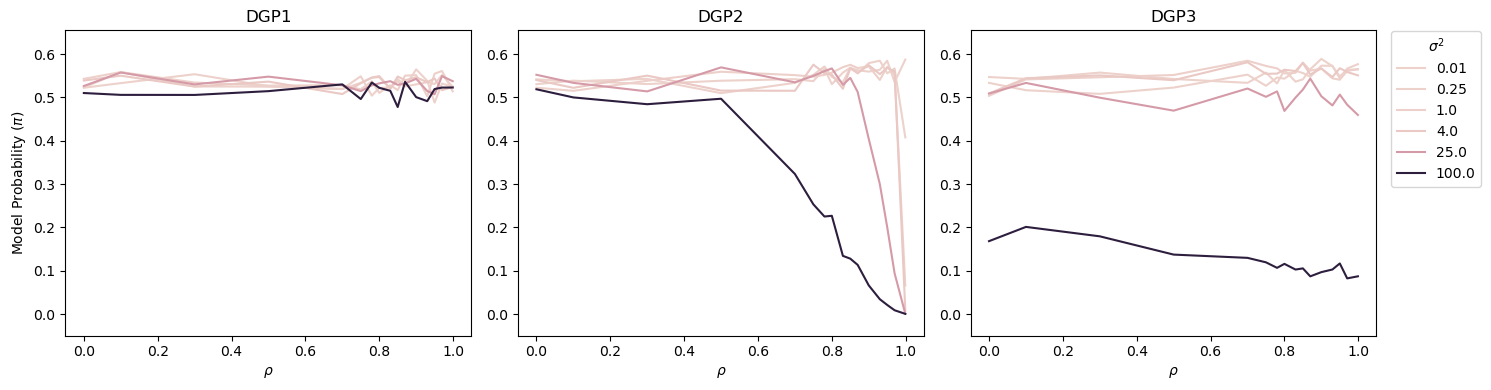

In [77]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (15, 4))


df = true_res_df[true_res_df['var'] > 0]

sns.lineplot(data=df[df['Dataset'] == 'DGP1'], x='rho', y='prob', hue='var', ax=axs[0])
sns.lineplot(data=df[df['Dataset'] == 'DGP2'], x='rho', y='prob', hue='var', ax=axs[1])
sns.lineplot(data=df[df['Dataset'] == 'DGP3'], x='rho', y='prob', hue='var', ax=axs[2])

axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].legend(title='$\\sigma^2$', bbox_to_anchor=(1.02, 1.02))

axs[0].set_ylabel('Model Probability ($\\pi$)')
axs[1].set_ylabel('')
axs[2].set_ylabel('')

axs[0].set_xlabel('$\\rho$')
axs[1].set_xlabel('$\\rho$')
axs[2].set_xlabel('$\\rho$')


axs[0].set_title('DGP1')
axs[1].set_title('DGP2')
axs[2].set_title('DGP3')

axs[0].set_ylim((-0.05, 0.655))
axs[1].set_ylim((-0.05, 0.655))
axs[2].set_ylim((-0.05, 0.655))


fig.tight_layout()

plt.savefig('../Plots/3_model_prob_rho.pdf')

---
## Part 4: Lasso Model Selection

In [110]:
from project.lasso_mc import Lasso_MC
from project.monte_carlo import MC_Datasets

import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [111]:
mc_dataset = MC_Datasets(show_progress=True)
mc_dataset.create_datasets(beta=[-5, 3, 2])

In [112]:
model = Lasso_MC(mc_dataset=mc_dataset, lambdas=np.arange(0.0001, 2, 0.005))
res = model.fit()

100%|██████████| 100/100 [02:27<00:00,  1.47s/it]


In [113]:
res

,Dataset,lambda,score,mse,coef_mse,nzero_coef,beta_0,beta_1,beta_2,beta_3,...,beta_90,beta_91,beta_92,beta_93,beta_94,beta_95,beta_96,beta_97,beta_98,beta_99
0,DGP1,0.0001,0.996654,0.125213,0.002554,0.47,-4.997973,2.998326,1.996736,-0.001870,...,-0.001498,0.003871,-0.004540,0.002049,0.001308,-0.002099,0.006637,-0.004714,-0.006507,-0.000463
1,DGP1,0.0051,0.996495,0.131149,0.001474,15.61,-4.990408,2.989843,1.988703,-0.001237,...,-0.000897,0.001925,-0.002196,0.001370,0.002208,-0.000783,0.004661,-0.002945,-0.004933,0.000293
2,DGP1,0.0101,0.996198,0.142248,0.000964,29.52,-4.983869,2.983902,1.982095,-0.001357,...,-0.000721,0.001098,-0.000754,0.001021,0.002634,-0.000533,0.003597,-0.001989,-0.003672,0.000236
3,DGP1,0.0151,0.995865,0.154708,0.000678,40.70,-4.978148,2.978502,1.976233,-0.000861,...,-0.000465,0.001406,0.000436,0.001213,0.002753,-0.000263,0.002825,-0.001567,-0.002926,-0.000165
4,DGP1,0.0201,0.995533,0.167138,0.000502,50.15,-4.972870,2.973444,1.971069,-0.000783,...,-0.000383,0.001733,0.001304,0.001398,0.002665,-0.000208,0.002298,-0.001138,-0.002225,-0.000382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,DGP3,1.9751,0.000000,7.465759,0.380000,100.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1196,DGP3,1.9801,0.000000,7.465759,0.380000,100.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1197,DGP3,1.9851,0.000000,7.465759,0.380000,100.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1198,DGP3,1.9901,0.000000,7.465759,0.380000,100.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


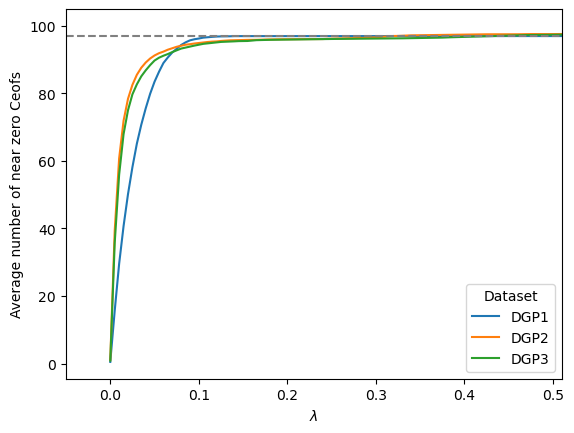

In [121]:
sns.lineplot(data=res, x = 'lambda', y='nzero_coef', hue='Dataset')
plt.hlines(y=97, xmin=-0.05, xmax=0.51, color='gray', linestyle='dashed')
# plt.xscale('log')
plt.xlabel('$\\lambda$')
plt.ylabel('Average number of near zero Ceofs')
plt.xlim((-0.05, 0.51))
plt.savefig('../Plots/4_Lasso_nzero.pdf', bbox_inches='tight')

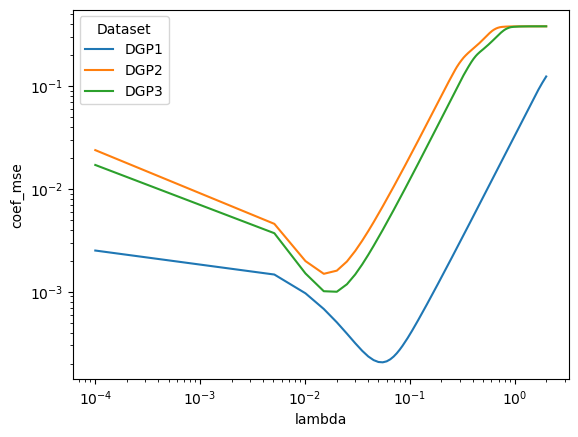

In [59]:
sns.lineplot(data=res, x = 'lambda', y='coef_mse', hue='Dataset')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [60]:
model.fit_cv()

100%|██████████| 100/100 [00:27<00:00,  3.67it/s]


,Dataset,lambda,score,mse,coef_mse,nzero_coef,beta_0,beta_1,beta_2,beta_3,...,beta_90,beta_91,beta_92,beta_93,beta_94,beta_95,beta_96,beta_97,beta_98,beta_99
0,DGP1,0.05830,0.993662,0.235789,0.000227,87.63,-4.930979,2.936530,1.933881,-0.002166,...,-0.000344,0.000194,0.000323,-0.000678,0.000419,0.000473,-0.001181,-0.000710,0.000256,-0.000046
1,DGP2,0.02235,0.960300,0.229103,0.001869,79.56,-4.751242,2.769209,1.958901,0.010356,...,-0.000186,-0.000325,0.000095,-0.000914,0.001446,0.000738,0.000824,-0.000530,-0.002815,-0.003563
2,DGP3,0.02605,0.969728,0.225546,0.001288,80.38,-4.788522,2.800486,1.965939,0.017172,...,0.001565,0.000317,-0.001496,0.000472,0.000753,-0.002240,-0.002563,0.001938,0.000292,-0.000107


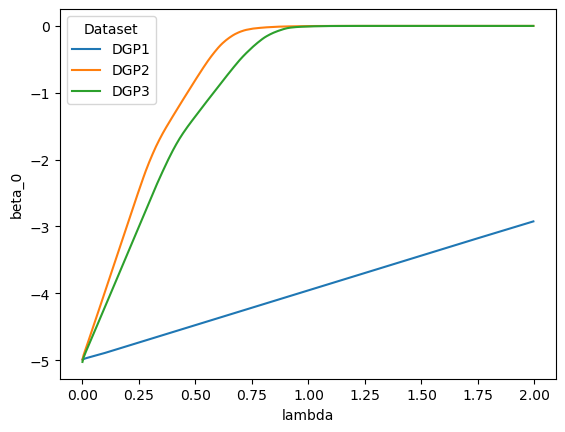

In [61]:
sns.lineplot(data=res, x = 'lambda', y='beta_0', hue='Dataset')
plt.show()

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [7]:
results = []
results_cv = []

r_v_list = []
for r in [0.0, 0.2, 0.5, 0.8, 0.99]:
    for v in [0, 0.1, 0.5, 1, 4]:
        r_v_list.append((r, v))


for rho, var in tqdm(r_v_list):

    mc_dataset = MC_Datasets(show_progress=False, n_iter=100)
    mc_dataset.create_datasets(beta=[-5, 3, 2], rho=rho, err_variance=var)
    model = Lasso_MC(mc_dataset=mc_dataset, lambdas=np.arange(0.0001, 0.5, 0.05).tolist() + [0.5, 1, 1.5, 2])
    res = model.fit()
    res_cv = model.fit_cv()

    res['rho'] = rho
    res['var'] = var

    res_cv['rho'] = rho
    res_cv['var'] = var
    
    results.append(res)
    results_cv.append(res_cv)


res_df = pd.concat(results, ignore_index=True)
res_cv_df = pd.concat(results_cv, ignore_index=True)

try:
    res_df = pd.concat([pd.read_csv('../Data/Lasso_lambda_rho_var.csv'), res_df], ignore_index=True)
    res_cv_df = pd.concat([pd.read_csv('../Data/LassoCV_lambda_rho_var.csv'), res_cv_df], ignore_index=True)
except:
    pass


res_df.to_csv('../Data/Lasso_lambda_rho_var.csv', index=False)
res_cv_df.to_csv('../Data/LassoCV_lambda_rho_var.csv', index=False)

 96%|█████████▌| 24/25 [05:20<00:26, 26.15s/it]c:\Users\Sadra\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16380460163907173, tolerance: 0.07544301049464838
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Sadra\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07255631579184296, tolerance: 0.07047393578346656
  model = cd_fast.enet_coordinate_descent_gram(
100%|██████████| 25/25 [06:03<00:00, 14.55s/it]


In [62]:
res_df = pd.read_csv('../Data/Lasso_lambda_rho_var.csv')
res_cv_df = pd.read_csv('../Data/LassoCV_lambda_rho_var.csv')

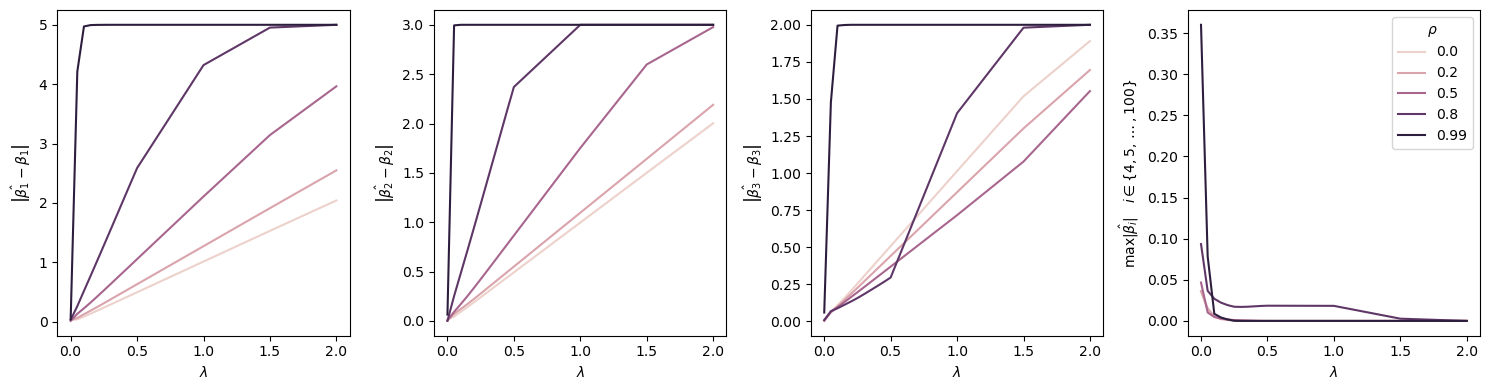

In [64]:
df = res_df[res_df['var'] == 1.0].copy()

t_df = df.groupby(['rho', 'lambda', 'Dataset'])[[f'beta_{i}' for i in range(3, 100)]].agg(lambda x: np.abs(x).max())
mx = t_df.values.max(axis=1)
t_df = t_df.reset_index()[['rho', 'lambda', 'Dataset']]
t_df['diff'] = mx
t_df


fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(15, 4))


df['beta_0'] = np.abs(df['beta_0'] + 5)
df['beta_1'] = np.abs(df['beta_1'] - 3) 
df['beta_2'] = np.abs(df['beta_2'] - 2) 


sns.lineplot(
    data = df[(df['Dataset'] == 'DGP2')],
    x = 'lambda', y = 'beta_0', hue='rho', ax=axs[0]
)
axs[0].set_ylabel('$\\left|\\hat{\\beta_1} - \\beta_1\\right|$')
axs[0].set_xlabel('$\\lambda$')
axs[0].get_legend().remove()


sns.lineplot(
    data = df[(df['Dataset'] == 'DGP2')],
    x = 'lambda', y = 'beta_1', hue='rho', ax=axs[1]
)
axs[1].set_ylabel('$\\left|\\hat{\\beta_2} - \\beta_2\\right|$')
axs[1].set_xlabel('$\\lambda$')
axs[1].get_legend().remove()

sns.lineplot(
    data = df[(df['Dataset'] == 'DGP2')],
    x = 'lambda', y = 'beta_2', hue='rho', ax=axs[2]
)
axs[2].set_ylabel('$\\left|\\hat{\\beta_3} - \\beta_3\\right|$')
axs[2].set_xlabel('$\\lambda$')
axs[2].get_legend().remove()

sns.lineplot(
    data = t_df[(t_df['Dataset'] == 'DGP2')],
    x = 'lambda', y = 'diff', hue='rho', ax=axs[3]
)
axs[3].set_ylabel('$\\max |\\hat{\\beta_i}| \\quad i \\in \{4, 5, \\dots, 100\}$')
axs[3].set_xlabel('$\\lambda$')
axs[3].legend(loc='upper right', title='$\\rho$')


fig.tight_layout()
plt.savefig('../Plots/4_Lasso_beta_diff_rho_DGP2.pdf', bbox_inches = 'tight')

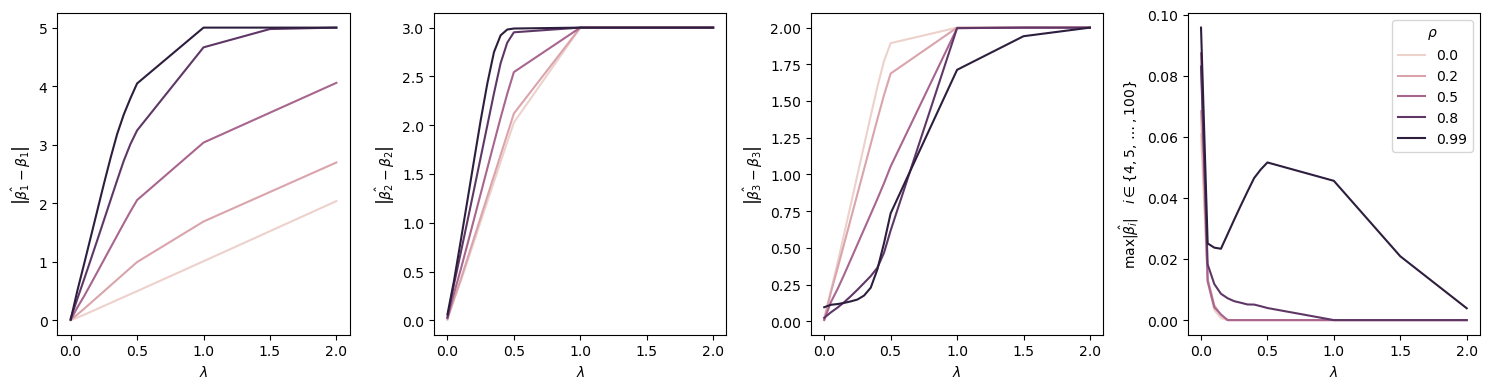

In [65]:
df = res_df[res_df['var'] == 1.0].copy()

t_df = df.groupby(['rho', 'lambda', 'Dataset'])[[f'beta_{i}' for i in range(3, 100)]].agg(lambda x: np.abs(x).max())
mx = t_df.values.max(axis=1)
t_df = t_df.reset_index()[['rho', 'lambda', 'Dataset']]
t_df['diff'] = mx
t_df


fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(15, 4))


df['beta_0'] = np.abs(df['beta_0'] + 5)
df['beta_1'] = np.abs(df['beta_1'] - 3) 
df['beta_2'] = np.abs(df['beta_2'] - 2) 


sns.lineplot(
    data = df[(df['Dataset'] == 'DGP3')],
    x = 'lambda', y = 'beta_0', hue='rho', ax=axs[0]
)
axs[0].set_ylabel('$\\left|\\hat{\\beta_1} - \\beta_1\\right|$')
axs[0].set_xlabel('$\\lambda$')
axs[0].get_legend().remove()


sns.lineplot(
    data = df[(df['Dataset'] == 'DGP3')],
    x = 'lambda', y = 'beta_1', hue='rho', ax=axs[1]
)
axs[1].set_ylabel('$\\left|\\hat{\\beta_2} - \\beta_2\\right|$')
axs[1].set_xlabel('$\\lambda$')
axs[1].get_legend().remove()

sns.lineplot(
    data = df[(df['Dataset'] == 'DGP3')],
    x = 'lambda', y = 'beta_2', hue='rho', ax=axs[2]
)
axs[2].set_ylabel('$\\left|\\hat{\\beta_3} - \\beta_3\\right|$')
axs[2].set_xlabel('$\\lambda$')
axs[2].get_legend().remove()

sns.lineplot(
    data = t_df[(t_df['Dataset'] == 'DGP3')],
    x = 'lambda', y = 'diff', hue='rho', ax=axs[3]
)
axs[3].set_ylabel('$\\max |\\hat{\\beta_i}| \\quad i \\in \{4, 5, \\dots, 100\}$')
axs[3].set_xlabel('$\\lambda$')
axs[3].legend(loc='upper right', title='$\\rho$')


fig.tight_layout()
plt.savefig('../Plots/4_Lasso_beta_diff_rho_DGP3.pdf', bbox_inches = 'tight')

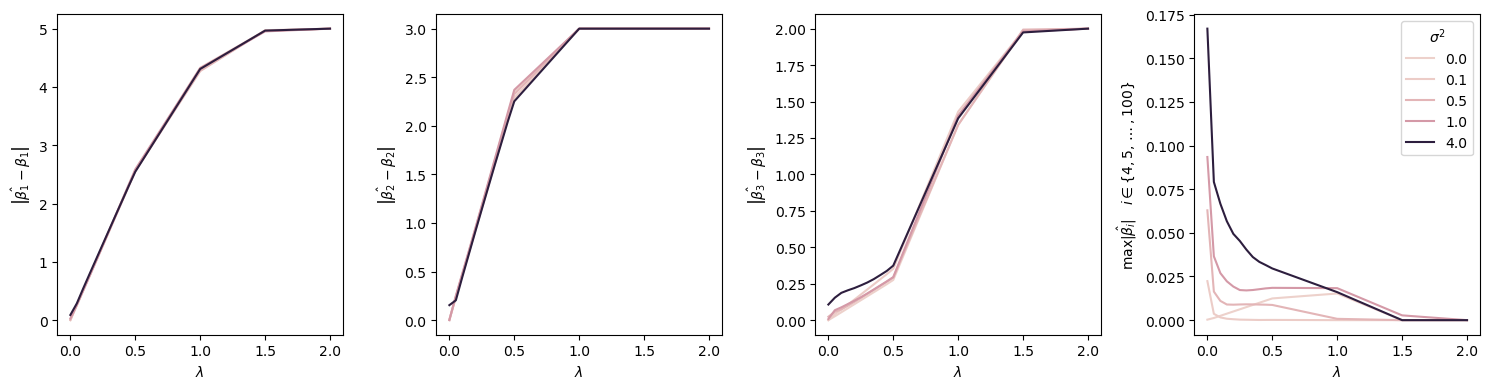

In [66]:
df = res_df[res_df['rho'] == 0.8].copy()

t_df = df.groupby(['var', 'lambda', 'Dataset'])[[f'beta_{i}' for i in range(3, 100)]].agg(lambda x: np.abs(x).max())
mx = t_df.values.max(axis=1)
t_df = t_df.reset_index()[['var', 'lambda', 'Dataset']]
t_df['diff'] = mx
t_df


fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(15, 4))


df['beta_0'] = np.abs(df['beta_0'] + 5)
df['beta_1'] = np.abs(df['beta_1'] - 3) 
df['beta_2'] = np.abs(df['beta_2'] - 2) 


sns.lineplot(
    data = df[(df['Dataset'] == 'DGP2')],
    x = 'lambda', y = 'beta_0', hue='var', ax=axs[0]
)
axs[0].set_ylabel('$\\left|\\hat{\\beta_1} - \\beta_1\\right|$')
axs[0].set_xlabel('$\\lambda$')
axs[0].get_legend().remove()


sns.lineplot(
    data = df[(df['Dataset'] == 'DGP2')],
    x = 'lambda', y = 'beta_1', hue='var', ax=axs[1]
)
axs[1].set_ylabel('$\\left|\\hat{\\beta_2} - \\beta_2\\right|$')
axs[1].set_xlabel('$\\lambda$')
axs[1].get_legend().remove()

sns.lineplot(
    data = df[(df['Dataset'] == 'DGP2')],
    x = 'lambda', y = 'beta_2', hue='var', ax=axs[2]
)
axs[2].set_ylabel('$\\left|\\hat{\\beta_3} - \\beta_3\\right|$')
axs[2].set_xlabel('$\\lambda$')
axs[2].get_legend().remove()

sns.lineplot(
    data = t_df[(t_df['Dataset'] == 'DGP2')],
    x = 'lambda', y = 'diff', hue='var', ax=axs[3]
)
axs[3].set_ylabel('$\\max |\\hat{\\beta_i}| \\quad i \\in \{4, 5, \\dots, 100\}$')
axs[3].set_xlabel('$\\lambda$')
axs[3].legend(loc='upper right', title='$\\sigma^2$')


fig.tight_layout()
plt.savefig('../Plots/4_Lasso_beta_diff_var_DGP2.pdf', bbox_inches = 'tight')

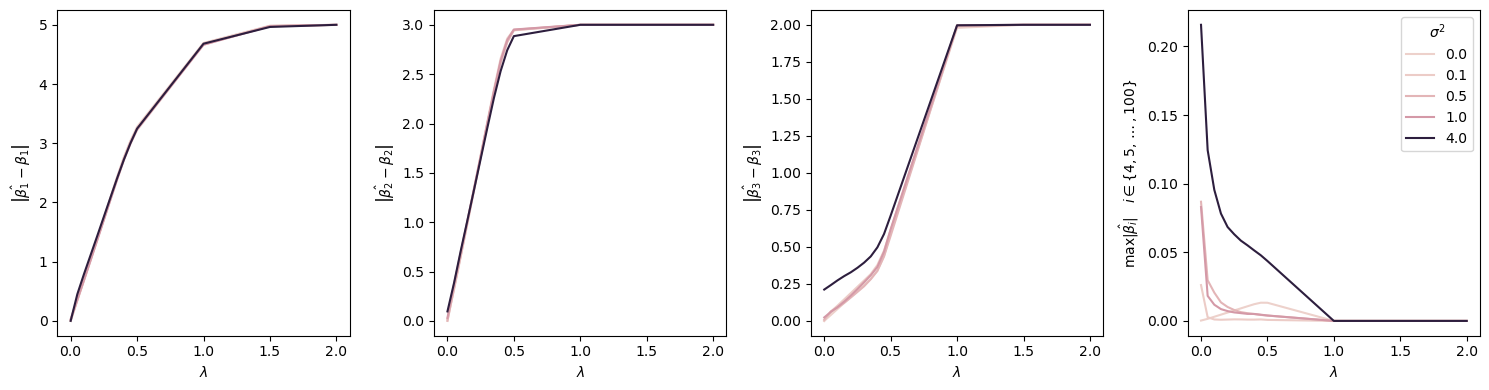

In [67]:
df = res_df[res_df['rho'] == 0.8].copy()

t_df = df.groupby(['var', 'lambda', 'Dataset'])[[f'beta_{i}' for i in range(3, 100)]].agg(lambda x: np.abs(x).max())
mx = t_df.values.max(axis=1)
t_df = t_df.reset_index()[['var', 'lambda', 'Dataset']]
t_df['diff'] = mx
t_df


fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(15, 4))


df['beta_0'] = np.abs(df['beta_0'] + 5)
df['beta_1'] = np.abs(df['beta_1'] - 3) 
df['beta_2'] = np.abs(df['beta_2'] - 2) 


sns.lineplot(
    data = df[(df['Dataset'] == 'DGP3')],
    x = 'lambda', y = 'beta_0', hue='var', ax=axs[0]
)
axs[0].set_ylabel('$\\left|\\hat{\\beta_1} - \\beta_1\\right|$')
axs[0].set_xlabel('$\\lambda$')
axs[0].get_legend().remove()


sns.lineplot(
    data = df[(df['Dataset'] == 'DGP3')],
    x = 'lambda', y = 'beta_1', hue='var', ax=axs[1]
)
axs[1].set_ylabel('$\\left|\\hat{\\beta_2} - \\beta_2\\right|$')
axs[1].set_xlabel('$\\lambda$')
axs[1].get_legend().remove()

sns.lineplot(
    data = df[(df['Dataset'] == 'DGP3')],
    x = 'lambda', y = 'beta_2', hue='var', ax=axs[2]
)
axs[2].set_ylabel('$\\left|\\hat{\\beta_3} - \\beta_3\\right|$')
axs[2].set_xlabel('$\\lambda$')
axs[2].get_legend().remove()

sns.lineplot(
    data = t_df[(t_df['Dataset'] == 'DGP3')],
    x = 'lambda', y = 'diff', hue='var', ax=axs[3]
)
axs[3].set_ylabel('$\\max |\\hat{\\beta_i}| \\quad i \\in \{4, 5, \\dots, 100\}$')
axs[3].set_xlabel('$\\lambda$')
axs[3].legend(loc='upper right', title='$\\sigma^2$')


fig.tight_layout()
plt.savefig('../Plots/4_Lasso_beta_diff_var_DGP3.pdf', bbox_inches = 'tight')

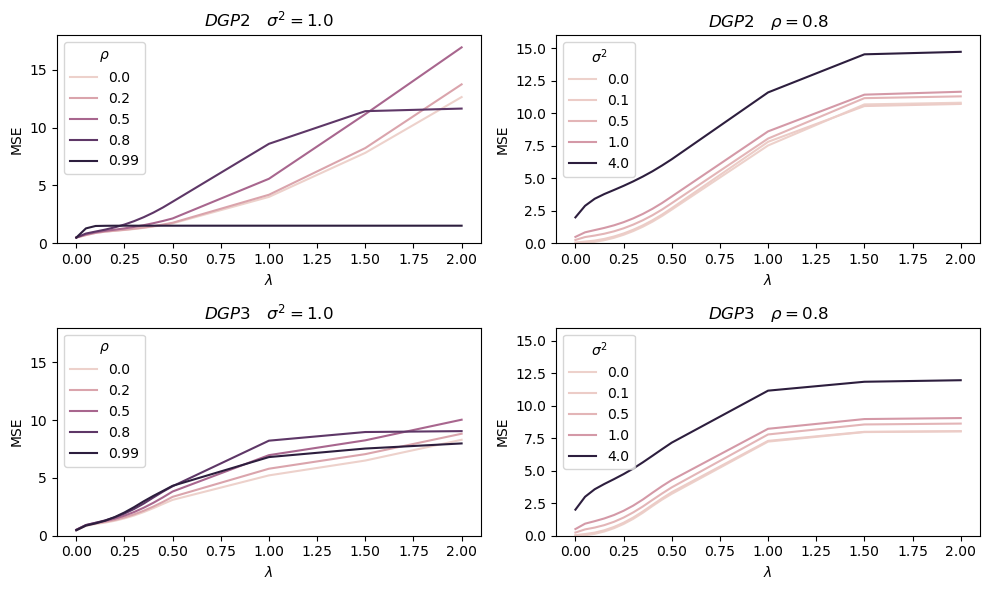

In [68]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

df = res_df[(res_df['var'] == 1)]
sns.lineplot(data=df[df['Dataset'] == 'DGP2'], x='lambda', y='mse', hue='rho', ax=axs[0][0])
axs[0][0].legend(title = '$\\rho$')
axs[0][0].set_ylabel('MSE')
axs[0][0].set_xlabel('$\\lambda$')
axs[0][0].set_title('$DGP2 \quad\\sigma^2 = 1.0$')

df = res_df[res_df['rho'] == 0.8]
sns.lineplot(data=df[df['Dataset'] == 'DGP2'], x='lambda', y='mse', hue='var', ax=axs[0][1])
axs[0][1].legend(title = '$\\sigma^2$')
axs[0][1].set_ylabel('MSE')
axs[0][1].set_xlabel('$\\lambda$')
axs[0][1].set_title('$DGP2 \quad\\rho = 0.8$')


df = res_df[(res_df['var'] == 1)]
sns.lineplot(data=df[df['Dataset'] == 'DGP3'], x='lambda', y='mse', hue='rho', ax=axs[1][0])
axs[1][0].legend(title = '$\\rho$')
axs[1][0].set_ylabel('MSE')
axs[1][0].set_xlabel('$\\lambda$')
axs[1][0].set_title('$DGP3 \quad\\sigma^2 = 1.0$')

df = res_df[res_df['rho'] == 0.8]
sns.lineplot(data=df[df['Dataset'] == 'DGP3'], x='lambda', y='mse', hue='var', ax=axs[1][1])
axs[1][1].legend(title = '$\\sigma^2$')
axs[1][1].set_ylabel('MSE')
axs[1][1].set_xlabel('$\\lambda$')
axs[1][1].set_title('$DGP3 \quad \\rho = 0.8$')

axs[0][0].set_ylim((0, 18))
axs[1][0].set_ylim((0, 18))

axs[0][1].set_ylim((0, 16))
axs[1][1].set_ylim((0, 16))


fig.tight_layout()
plt.savefig('../Plots/4_Lasso_MSE_rho_var.pdf', bbox_inches='tight')

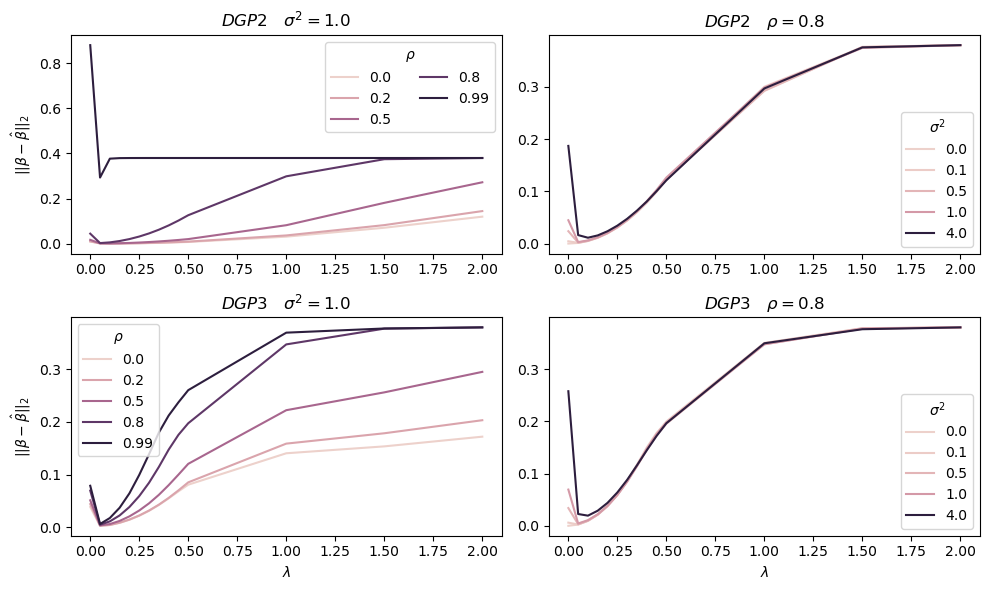

In [69]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

df = res_df[(res_df['var'] == 1)]
sns.lineplot(data=df[df['Dataset'] == 'DGP2'], x='lambda', y='coef_mse', hue='rho', ax=axs[0][0])
axs[0][0].legend(title = '$\\rho$', ncol=2)
axs[0][0].set_ylabel('$||\\beta - \\hat{\\beta}||_2$')
axs[0][0].set_xlabel('')
axs[0][0].set_title('$DGP2\\quad\\sigma^2 = 1.0$')

df = res_df[res_df['rho'] == 0.8]
sns.lineplot(data=df[df['Dataset'] == 'DGP2'], x='lambda', y='coef_mse', hue='var', ax=axs[0][1])
axs[0][1].legend(title = '$\\sigma^2$')
axs[0][1].set_ylabel('')
axs[0][1].set_xlabel('')
axs[0][1].set_title('$DGP2\\quad\\rho = 0.8$')


df = res_df[(res_df['var'] == 1)]
sns.lineplot(data=df[df['Dataset'] == 'DGP3'], x='lambda', y='coef_mse', hue='rho', ax=axs[1][0])
axs[1][0].legend(title = '$\\rho$')
axs[1][0].set_ylabel('$||\\beta - \\hat{\\beta}||_2$')
axs[1][0].set_xlabel('$\\lambda$')
axs[1][0].set_title('$DGP3\\quad\\sigma^2 = 1.0$')

df = res_df[res_df['rho'] == 0.8]
sns.lineplot(data=df[df['Dataset'] == 'DGP3'], x='lambda', y='coef_mse', hue='var', ax=axs[1][1])
axs[1][1].legend(title = '$\\sigma^2$')
axs[1][1].set_ylabel('')
axs[1][1].set_xlabel('$\\lambda$')
axs[1][1].set_title('$DGP3\\quad\\rho = 0.8$')

fig.tight_layout()
plt.savefig('../Plots/4_Lasso_coef_diff.pdf', bbox_inches='tight')

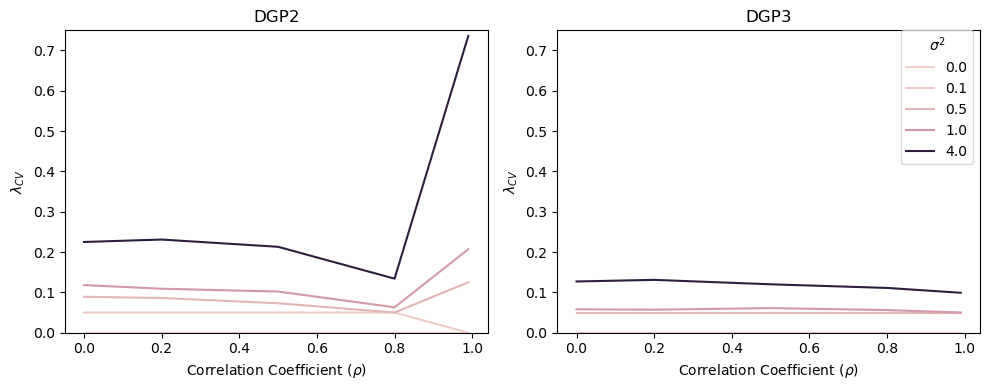

In [72]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.lineplot(data = res_cv_df[res_cv_df['Dataset'] == 'DGP2'], x='rho', y='lambda', hue='var', ax=axs[0])
sns.lineplot(data = res_cv_df[res_cv_df['Dataset'] == 'DGP3'], x='rho', y='lambda', hue='var', ax=axs[1])

axs[0].set_xlabel('Correlation Coefficient ($\\rho$)')
axs[1].set_xlabel('Correlation Coefficient ($\\rho$)')

axs[0].set_ylabel('$\\lambda_{CV}$')
axs[1].set_ylabel('$\\lambda_{CV}$')

axs[0].set_ylim((0, 0.75))
axs[1].set_ylim((0, 0.75))

axs[0].set_title('DGP2')
axs[1].set_title('DGP3')

axs[0].get_legend().remove()
axs[1].legend(title = '$\\sigma^2$', bbox_to_anchor=(1, 1.025))

fig.tight_layout()

plt.savefig('../Plots/4_Lasso_lambda_cv_rho_var.pdf', bbox_inches='tight')

---
## Part 5: PCA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
from project.monte_carlo import MC_Datasets
from project.pca import MC_PCA

In [3]:
mc_ds = MC_Datasets(n_iter=100, show_progress=True)
mc_ds.create_datasets(beta=[-5, 3, 2], err_variance=25)

100%|██████████| 100/100 [00:01<00:00, 99.63it/s]


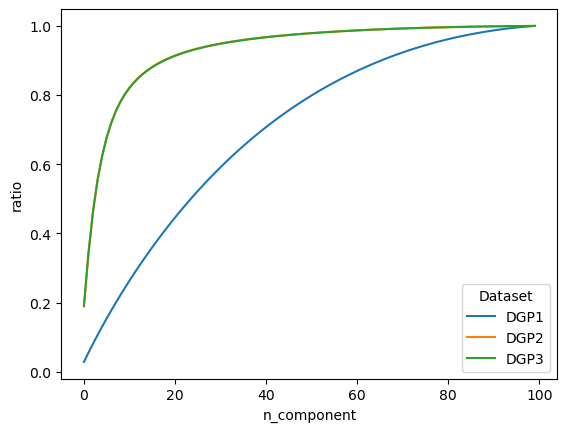

In [4]:
mc_pca = MC_PCA(mc_ds)
sns.lineplot(data=mc_pca.MC_get_explained_variance_ratio(), x='n_component', y='ratio', hue='Dataset')
plt.show()

In [51]:
df = mc_pca.MC_fit()

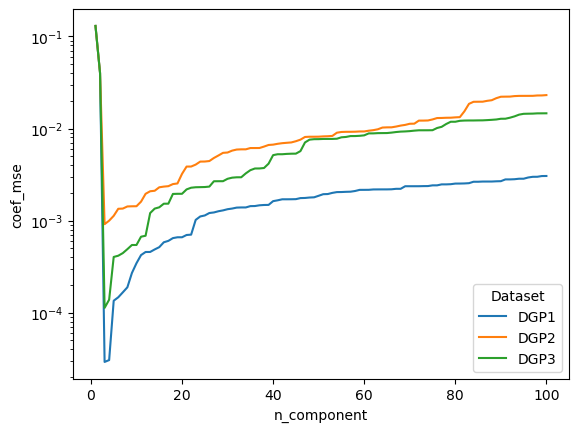

In [52]:
sns.lineplot(data=df, x='n_component', y='coef_mse', hue='Dataset')
plt.yscale('log')
plt.show()

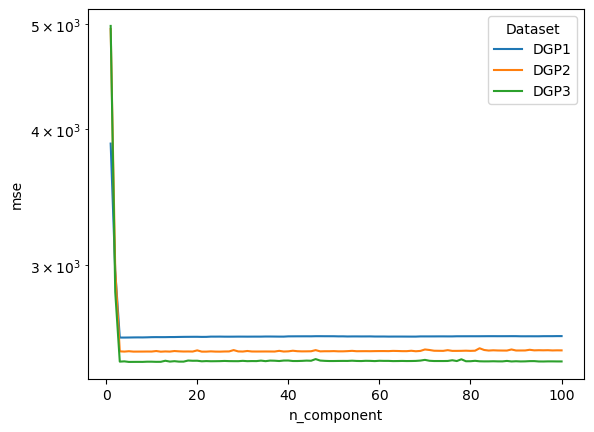

In [53]:
sns.lineplot(data=df, x='n_component', y='mse', hue='Dataset')
plt.yscale('log')
plt.show()

In [5]:
fit_results = []
exp_var_results = []

setups = []
for rho in [0, 0.1, 0.3, 0.5, 0.7, 0.9, 0.99]:
    for sigma in [0, 0.1, 0.5, 1, 2, 5]:
        for n in [200]:
            setups += [(rho, sigma**2, n)]


for rho, var, n in tqdm(setups):
    mc_ds = MC_Datasets()
    mc_ds.create_datasets(err_variance=var, rho=rho, n_observ=n)
    pca_model = MC_PCA(mc_ds)

    exp_var_results.append(pca_model.MC_get_explained_variance_ratio())
    fit_results.append(pca_model.MC_fit())

pd.concat(exp_var_results, ignore_index=True).to_csv('../Data/PCA_var_explain.csv', index=False)
pd.concat(fit_results, ignore_index=True).to_csv('../Data/PCA_fit.csv', index=False)

  0%|          | 0/42 [00:00<?, ?it/s]

100%|██████████| 42/42 [03:15<00:00,  4.66s/it]


In [2]:
fit_df = pd.read_csv('../Data/PCA_fit.csv')
exp_df = pd.read_csv('../Data/PCA_var_explain.csv')

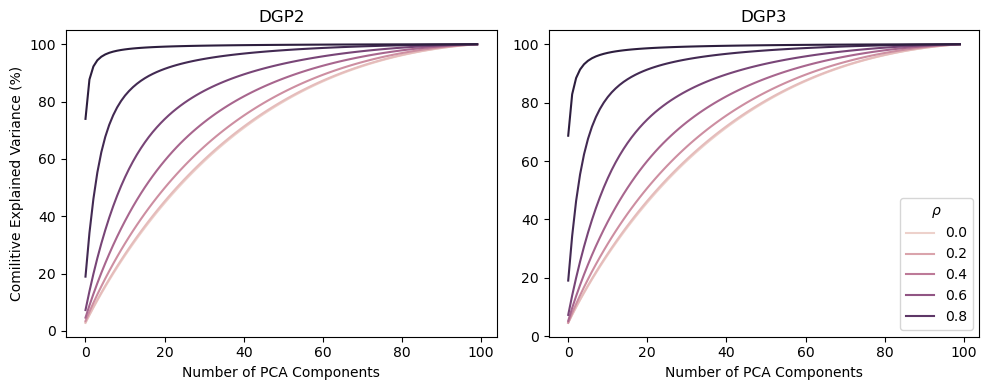

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

df = exp_df[(exp_df['Dataset'] == 'DGP2') & (exp_df['var'] == 1)]
sns.lineplot(x=df['n_component'], y=df['ratio'] * 100, hue=df['rho'], ax=axs[0])

df = exp_df[(exp_df['Dataset'] == 'DGP3') & (exp_df['var'] == 1)]
sns.lineplot(x=df['n_component'], y=df['ratio'] * 100, hue=df['rho'], ax=axs[1])

axs[0].set_ylabel('Comilitive Explained Variance (%)')
axs[1].set_ylabel('')

axs[0].set_xlabel('Number of PCA Components')
axs[1].set_xlabel('Number of PCA Components')

axs[0].set_title('DGP2')
axs[1].set_title('DGP3')

axs[0].get_legend().remove()
axs[1].legend(title = '$\\rho$')

fig.tight_layout()
plt.savefig('../Plots/5_PCA_var_n_rho.pdf', bbox_inches='tight')

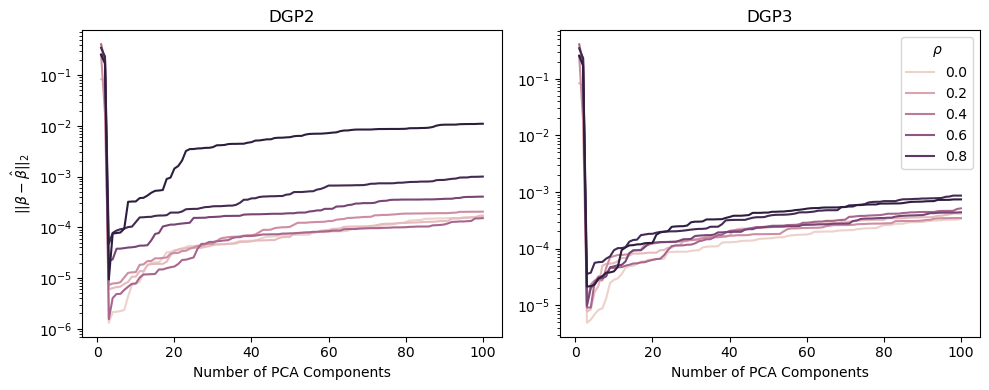

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

df = fit_df[(fit_df['Dataset'] == 'DGP2') & (fit_df['var'] == 1)]
sns.lineplot(x=df['n_component'], y=df['coef_mse'], hue=df['rho'], ax=axs[0])

df = fit_df[(fit_df['Dataset'] == 'DGP3') & (fit_df['var'] == 1)]
sns.lineplot(x=df['n_component'], y=df['coef_mse'], hue=df['rho'], ax=axs[1])

axs[0].set_ylabel('$||\\beta - \\hat{\\beta}||_2$')
axs[1].set_ylabel('')

axs[0].set_xlabel('Number of PCA Components')
axs[1].set_xlabel('Number of PCA Components')

axs[0].set_title('DGP2')
axs[1].set_title('DGP3')

axs[0].get_legend().remove()
axs[1].legend(title = '$\\rho$')

axs[0].set_yscale('log')
axs[1].set_yscale('log')


fig.tight_layout()
plt.savefig('../Plots/5_PCA_coef_mse_rho.pdf', bbox_inches='tight')

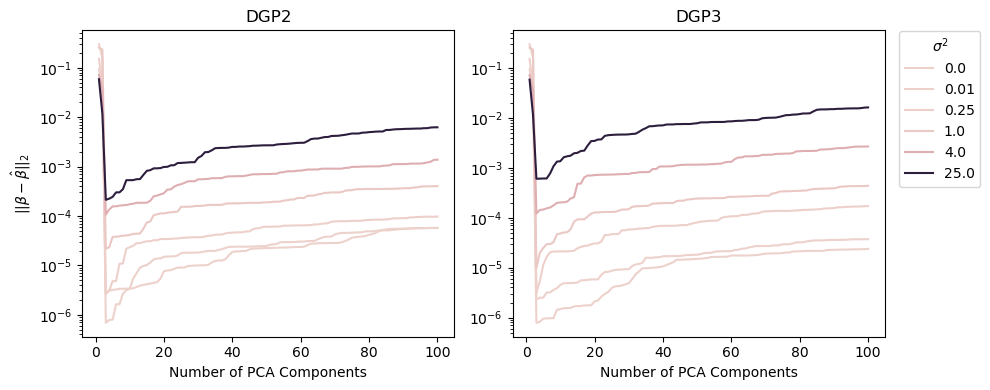

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

df = fit_df[(fit_df['Dataset'] == 'DGP2') & (fit_df['rho'] == 0.7)]
sns.lineplot(x=df['n_component'], y=df['coef_mse'], hue=df['var'], ax=axs[0])

df = fit_df[(fit_df['Dataset'] == 'DGP3') & (fit_df['rho'] == 0.7)]
sns.lineplot(x=df['n_component'], y=df['coef_mse'], hue=df['var'], ax=axs[1])

axs[0].set_ylabel('$||\\beta - \\hat{\\beta}||_2$')
axs[1].set_ylabel('')

axs[0].set_xlabel('Number of PCA Components')
axs[1].set_xlabel('Number of PCA Components')

axs[0].set_title('DGP2')
axs[1].set_title('DGP3')

axs[0].get_legend().remove()
axs[1].legend(title = '$\\sigma^2$', bbox_to_anchor=(1.02, 1.02))

axs[0].set_yscale('log')
axs[1].set_yscale('log')


fig.tight_layout()
plt.savefig('../Plots/5_PCA_coef_mse_var.pdf', bbox_inches='tight')

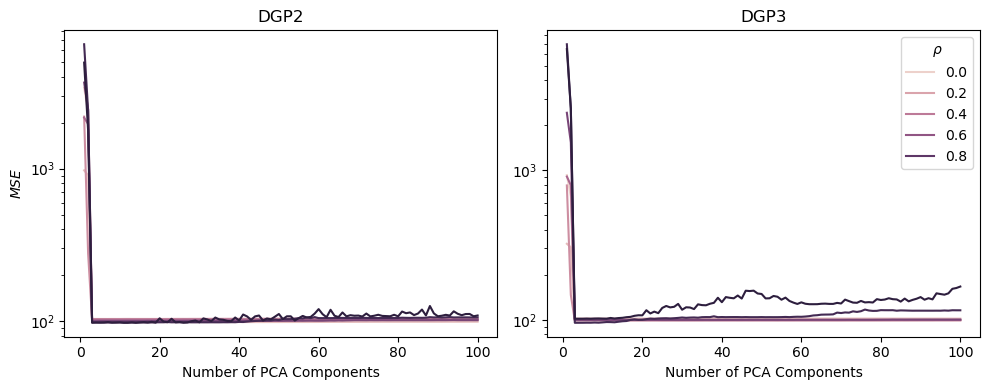

In [38]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

df = fit_df[(fit_df['Dataset'] == 'DGP2') & (fit_df['var'] == 1)]
sns.lineplot(x=df['n_component'], y=df['mse'], hue=df['rho'], ax=axs[0])

df = fit_df[(fit_df['Dataset'] == 'DGP3') & (fit_df['var'] == 1)]
sns.lineplot(x=df['n_component'], y=df['mse'], hue=df['rho'], ax=axs[1])

axs[0].set_ylabel('$MSE$')
axs[1].set_ylabel('')

axs[0].set_xlabel('Number of PCA Components')
axs[1].set_xlabel('Number of PCA Components')

axs[0].set_title('DGP2')
axs[1].set_title('DGP3')

axs[0].get_legend().remove()
axs[1].legend(title = '$\\rho$')

axs[0].set_yscale('log')
axs[1].set_yscale('log')


fig.tight_layout()
plt.savefig('../Plots/5_PCA_mse_rho.pdf', bbox_inches='tight')

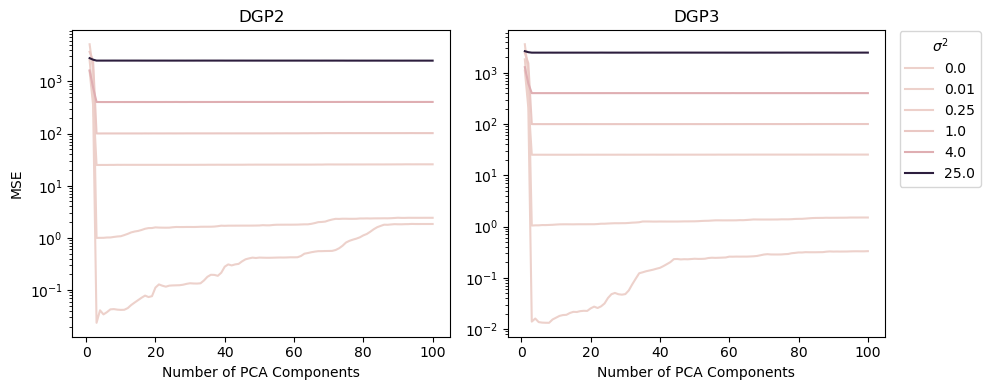

In [39]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

df = fit_df[(fit_df['Dataset'] == 'DGP2') & (fit_df['rho'] == 0.7)]
sns.lineplot(x=df['n_component'], y=df['mse'], hue=df['var'], ax=axs[0])

df = fit_df[(fit_df['Dataset'] == 'DGP3') & (fit_df['rho'] == 0.7)]
sns.lineplot(x=df['n_component'], y=df['mse'], hue=df['var'], ax=axs[1])

axs[0].set_ylabel('MSE')
axs[1].set_ylabel('')

axs[0].set_xlabel('Number of PCA Components')
axs[1].set_xlabel('Number of PCA Components')

axs[0].set_title('DGP2')
axs[1].set_title('DGP3')

axs[0].get_legend().remove()
axs[1].legend(title = '$\\sigma^2$', bbox_to_anchor=(1.02, 1.02))

axs[0].set_yscale('log')
axs[1].set_yscale('log')


fig.tight_layout()
plt.savefig('../Plots/5_PCA_mse_var.pdf', bbox_inches='tight')

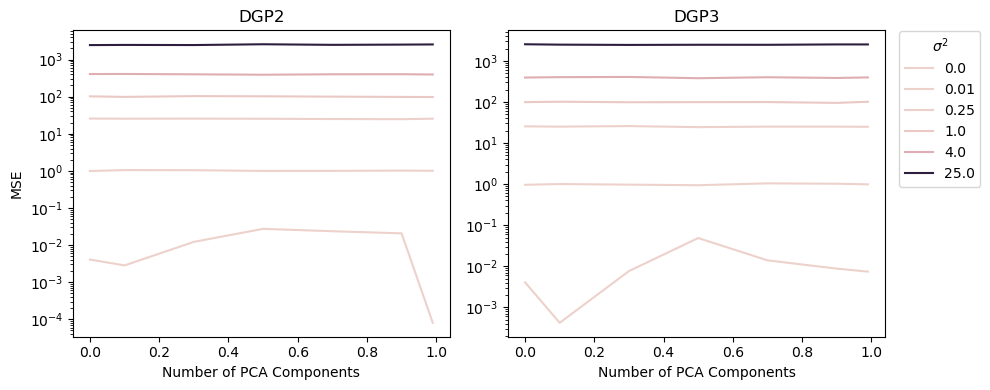

In [41]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

df = fit_df[(fit_df['Dataset'] == 'DGP2') & (fit_df['n_component'] == 3)]
sns.lineplot(x=df['rho'], y=df['mse'], hue=df['var'], ax=axs[0])

df = fit_df[(fit_df['Dataset'] == 'DGP3') & (fit_df['n_component'] == 3)]
sns.lineplot(x=df['rho'], y=df['mse'], hue=df['var'], ax=axs[1])

axs[0].set_ylabel('MSE')
axs[1].set_ylabel('')

axs[0].set_xlabel('Number of PCA Components')
axs[1].set_xlabel('Number of PCA Components')

axs[0].set_title('DGP2')
axs[1].set_title('DGP3')

axs[0].get_legend().remove()
axs[1].legend(title = '$\\sigma^2$', bbox_to_anchor=(1.02, 1.02))

axs[0].set_yscale('log')
axs[1].set_yscale('log')


fig.tight_layout()
plt.savefig('../Plots/5_PCA_mse_var_rho.pdf', bbox_inches='tight')

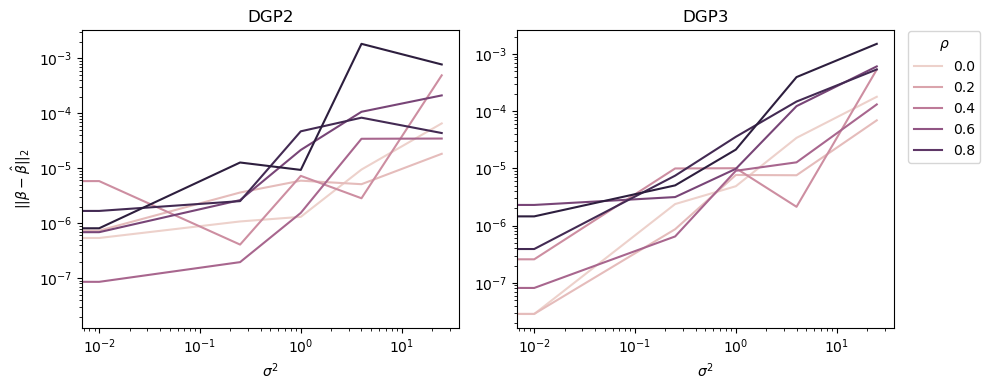

In [45]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

df = fit_df[(fit_df['Dataset'] == 'DGP2') & (fit_df['n_component'] == 3)]
sns.lineplot(x=df['var'], y=df['coef_mse'], hue=df['rho'], ax=axs[0])

df = fit_df[(fit_df['Dataset'] == 'DGP3') & (fit_df['n_component'] == 3)]
sns.lineplot(x=df['var'], y=df['coef_mse'], hue=df['rho'], ax=axs[1])

axs[0].set_ylabel('$||\\beta - \\hat{\\beta}||_2$')
axs[1].set_ylabel('')

axs[0].set_xlabel('$\\sigma^2$')
axs[1].set_xlabel('$\\sigma^2$')

axs[0].set_title('DGP2')
axs[1].set_title('DGP3')

axs[0].get_legend().remove()
axs[1].legend(title = '$\\rho$', bbox_to_anchor=(1.02, 1.02))

axs[0].set_yscale('log')
axs[1].set_yscale('log')

axs[0].set_xscale('log')
axs[1].set_xscale('log')



fig.tight_layout()
plt.savefig('../Plots/5_PCA_coef_mse_var_rho.pdf', bbox_inches='tight')

---
## Part 6: Compare Models


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
compare_df = pd.read_csv('../Data/compare_new.csv')
compare_df

,Dataset,Model,rho,err_var,n_obs,mse_avg,r2_avg,coef_diff_avg,mse_var,r2_var,coef_diff_var
0,DGP1,PCA3,0.00,0.00,500,35.847649,0.061233,0.369955,5.294179,0.002157,1.217673e-04
1,DGP2,PCA3,0.00,0.00,500,35.847649,0.061233,0.369955,5.294179,0.002157,1.217673e-04
2,DGP3,PCA3,0.00,0.00,500,3.637708,0.871370,0.148007,0.151002,0.000320,1.262705e-04
3,DGP1,PCA3,0.00,0.00,300,35.523019,0.062375,0.372335,7.714805,0.002400,1.191362e-04
4,DGP2,PCA3,0.00,0.00,300,35.523019,0.062375,0.372335,7.714805,0.002400,1.191362e-04
...,...,...,...,...,...,...,...,...,...,...,...
2659,DGP2,LASSO,0.99,0.25,100,0.192853,0.767753,0.039646,0.006089,0.005345,9.049484e-04
2660,DGP3,LASSO,0.99,0.25,100,0.186107,0.973751,0.003302,0.004267,0.000100,4.747146e-06
2661,DGP1,LASSO,0.99,0.25,50,0.171083,0.995431,0.001121,0.014275,0.000011,5.213284e-07
2662,DGP2,LASSO,0.99,0.25,50,0.198903,0.757234,0.138658,0.025733,0.041366,9.153622e-03


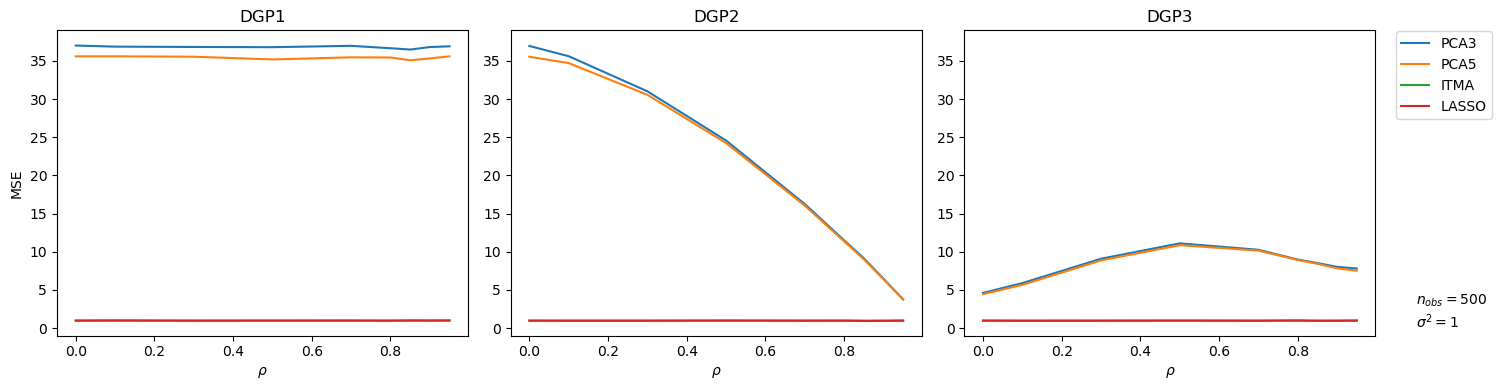

In [30]:
df = compare_df[(compare_df['n_obs'] == 500) & (compare_df['err_var'] == 1)]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

sns.lineplot(data=df[df['Dataset'] == 'DGP1'], x='rho', y='mse_avg', hue='Model', ax=axs[0])
sns.lineplot(data=df[df['Dataset'] == 'DGP2'], x='rho', y='mse_avg', hue='Model', ax=axs[1])
sns.lineplot(data=df[df['Dataset'] == 'DGP3'], x='rho', y='mse_avg', hue='Model', ax=axs[2])

axs[0].set_ylabel('MSE')
axs[1].set_ylabel('')
axs[2].set_ylabel('')


axs[0].set_ylim((-1, 39))
axs[1].set_ylim((-1, 39))
axs[2].set_ylim((-1, 39))

axs[0].set_xlabel('$\\rho$')
axs[1].set_xlabel('$\\rho$')
axs[2].set_xlabel('$\\rho$')

axs[0].set_title('DGP1')
axs[1].set_title('DGP2')
axs[2].set_title('DGP3')

axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].legend(bbox_to_anchor = (1.3, 1.02))

axs[2].text(1.1, 0, '$n_{obs} = 500$\n$\\sigma^2=1$')

fig.tight_layout()

plt.savefig('../Plots/6_cmp_mse_n500_s1.pdf', bbox_inches='tight')


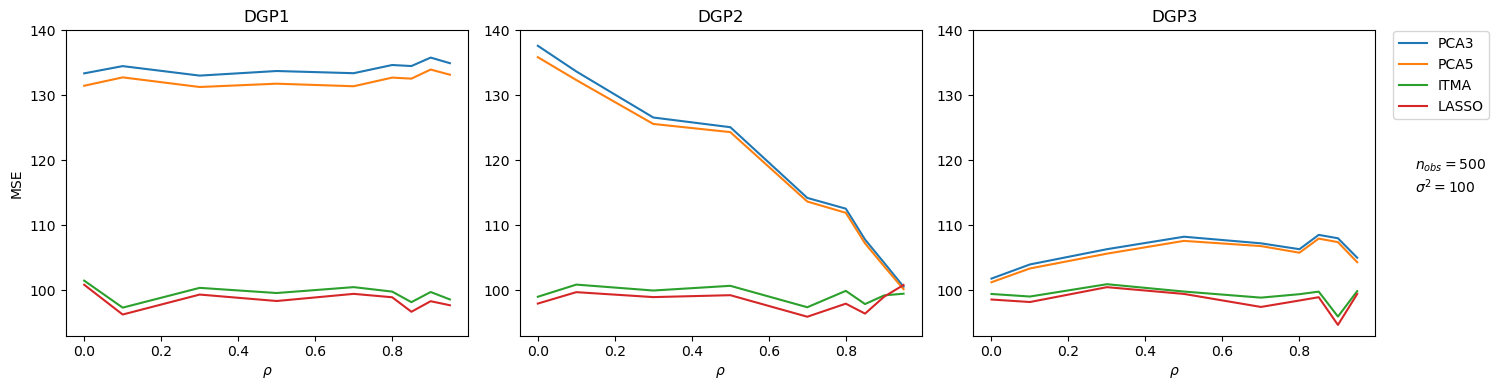

In [32]:
df = compare_df[(compare_df['n_obs'] == 500) & (compare_df['err_var'] == 100)]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

sns.lineplot(data=df[df['Dataset'] == 'DGP1'], x='rho', y='mse_avg', hue='Model', ax=axs[0])
sns.lineplot(data=df[df['Dataset'] == 'DGP2'], x='rho', y='mse_avg', hue='Model', ax=axs[1])
sns.lineplot(data=df[df['Dataset'] == 'DGP3'], x='rho', y='mse_avg', hue='Model', ax=axs[2])

axs[0].set_ylabel('MSE')
axs[1].set_ylabel('')
axs[2].set_ylabel('')


axs[0].set_ylim((93, 140))
axs[1].set_ylim((93, 140))
axs[2].set_ylim((93, 140))

axs[0].set_xlabel('$\\rho$')
axs[1].set_xlabel('$\\rho$')
axs[2].set_xlabel('$\\rho$')

axs[0].set_title('DGP1')
axs[1].set_title('DGP2')
axs[2].set_title('DGP3')

axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].legend(bbox_to_anchor = (1.3, 1.02))


axs[2].text(1.1, 115, '$n_{obs} = 500$\n$\\sigma^2=100$')

fig.tight_layout()

plt.savefig('../Plots/6_cmp_mse_n500_s100.pdf', bbox_inches='tight')


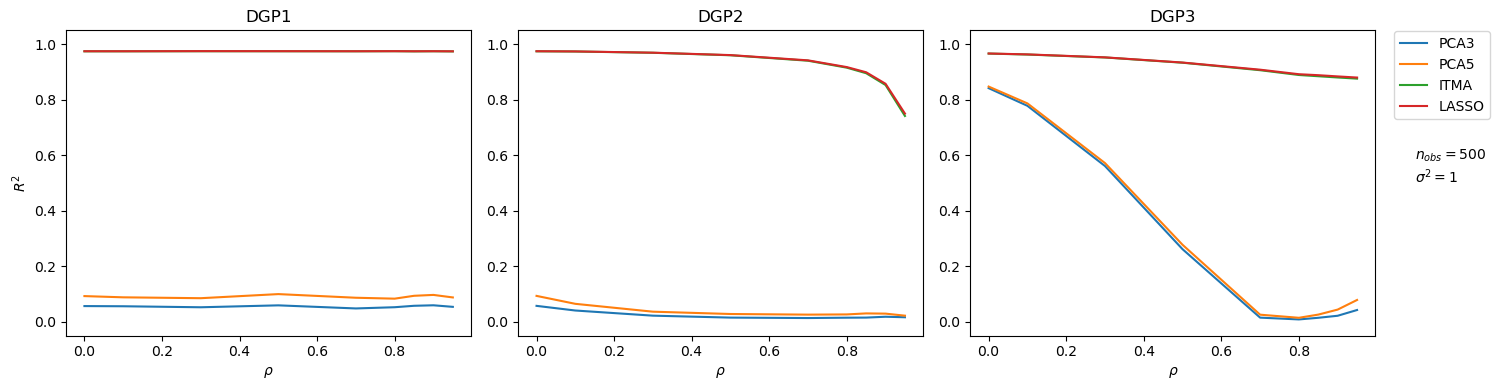

In [34]:
df = compare_df[(compare_df['n_obs'] == 500) & (compare_df['err_var'] == 1)]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

sns.lineplot(data=df[df['Dataset'] == 'DGP1'], x='rho', y='r2_avg', hue='Model', ax=axs[0])
sns.lineplot(data=df[df['Dataset'] == 'DGP2'], x='rho', y='r2_avg', hue='Model', ax=axs[1])
sns.lineplot(data=df[df['Dataset'] == 'DGP3'], x='rho', y='r2_avg', hue='Model', ax=axs[2])

axs[0].set_ylabel('$R^2$')
axs[1].set_ylabel('')
axs[2].set_ylabel('')


axs[0].set_ylim((-0.05, 1.05))
axs[1].set_ylim((-0.05, 1.05))
axs[2].set_ylim((-0.05, 1.05))

axs[0].set_xlabel('$\\rho$')
axs[1].set_xlabel('$\\rho$')
axs[2].set_xlabel('$\\rho$')

axs[0].set_title('DGP1')
axs[1].set_title('DGP2')
axs[2].set_title('DGP3')

axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].legend(bbox_to_anchor = (1.3, 1.02))


axs[2].text(1.1, 0.5, '$n_{obs} = 500$\n$\\sigma^2=1$')

fig.tight_layout()

plt.savefig('../Plots/6_cmp_r2_n500_s1.pdf', bbox_inches='tight')


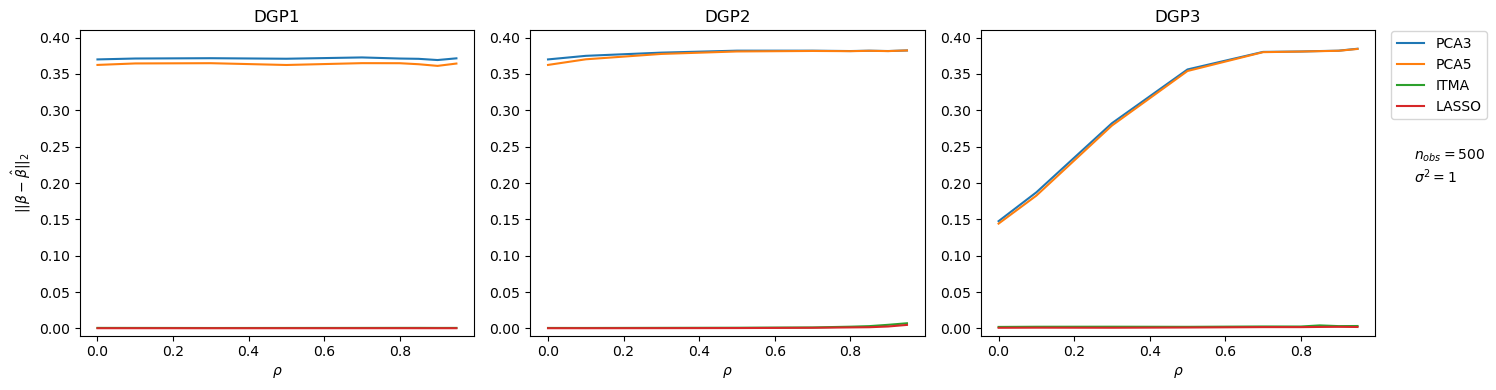

In [38]:
df = compare_df[(compare_df['n_obs'] == 500) & (compare_df['err_var'] == 1)]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

sns.lineplot(data=df[df['Dataset'] == 'DGP1'], x='rho', y='coef_diff_avg', hue='Model', ax=axs[0])
sns.lineplot(data=df[df['Dataset'] == 'DGP2'], x='rho', y='coef_diff_avg', hue='Model', ax=axs[1])
sns.lineplot(data=df[df['Dataset'] == 'DGP3'], x='rho', y='coef_diff_avg', hue='Model', ax=axs[2])

axs[0].set_ylabel('$||\\beta - \\hat{\\beta}||_2$')
axs[1].set_ylabel('')
axs[2].set_ylabel('')


axs[0].set_ylim((-0.01, 0.41))
axs[1].set_ylim((-0.01, 0.41))
axs[2].set_ylim((-0.01, 0.41))

axs[0].set_xlabel('$\\rho$')
axs[1].set_xlabel('$\\rho$')
axs[2].set_xlabel('$\\rho$')

axs[0].set_title('DGP1')
axs[1].set_title('DGP2')
axs[2].set_title('DGP3')

axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].legend(bbox_to_anchor = (1.3, 1.02))

axs[2].text(1.1, 0.2, '$n_{obs} = 500$\n$\\sigma^2=1$')

fig.tight_layout()

plt.savefig('../Plots/6_cmp_coef_n500_s1.pdf', bbox_inches='tight')


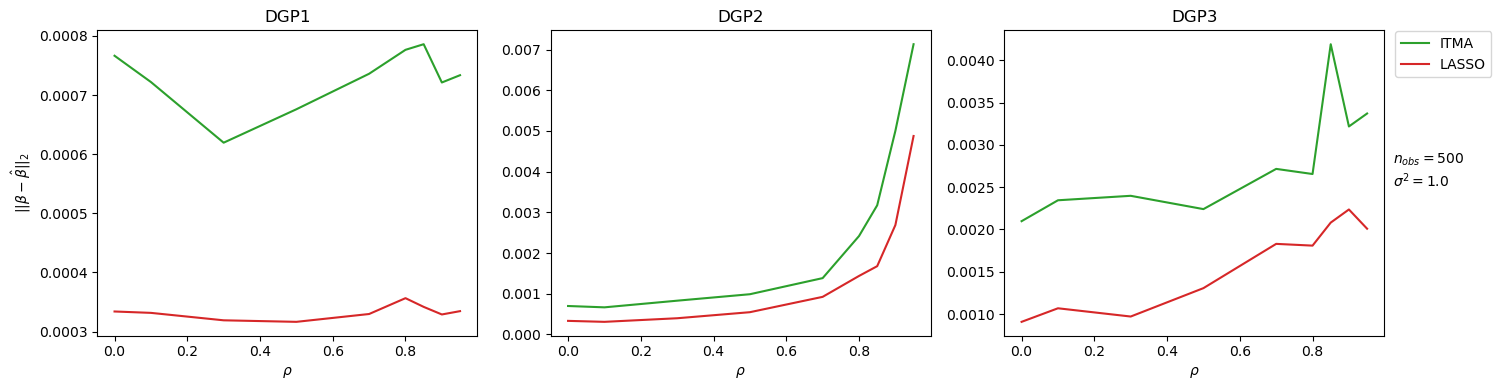

In [40]:
df = compare_df[(compare_df['n_obs'] == 500) & (compare_df['err_var'] == 1) & (compare_df['Model'] != 'PCA3') & (compare_df['Model'] != 'PCA5')]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

sns.lineplot(data=df[df['Dataset'] == 'DGP1'], x='rho', y='coef_diff_avg', hue='Model', palette=['tab:green', 'tab:red'], ax=axs[0])
sns.lineplot(data=df[df['Dataset'] == 'DGP2'], x='rho', y='coef_diff_avg', hue='Model', palette=['tab:green', 'tab:red'], ax=axs[1])
sns.lineplot(data=df[df['Dataset'] == 'DGP3'], x='rho', y='coef_diff_avg', hue='Model', palette=['tab:green', 'tab:red'], ax=axs[2])

axs[0].set_ylabel('$||\\beta - \\hat{\\beta}||_2$')
axs[1].set_ylabel('')
axs[2].set_ylabel('')


# axs[0].set_ylim((-3, 15))
# axs[1].set_ylim((-3, 24))
# axs[2].set_ylim((-3.05, 24))

axs[0].set_xlabel('$\\rho$')
axs[1].set_xlabel('$\\rho$')
axs[2].set_xlabel('$\\rho$')

axs[0].set_title('DGP1')
axs[1].set_title('DGP2')
axs[2].set_title('DGP3')

axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].legend(bbox_to_anchor = (1.3, 1.02))

axs[2].text(1.02, 0.0025, '$n_{obs} = 500$\n$\\sigma^2=1.0$')

fig.tight_layout()

plt.savefig('../Plots/6_cmp_coef_n500_s1_wpca.pdf', bbox_inches='tight')


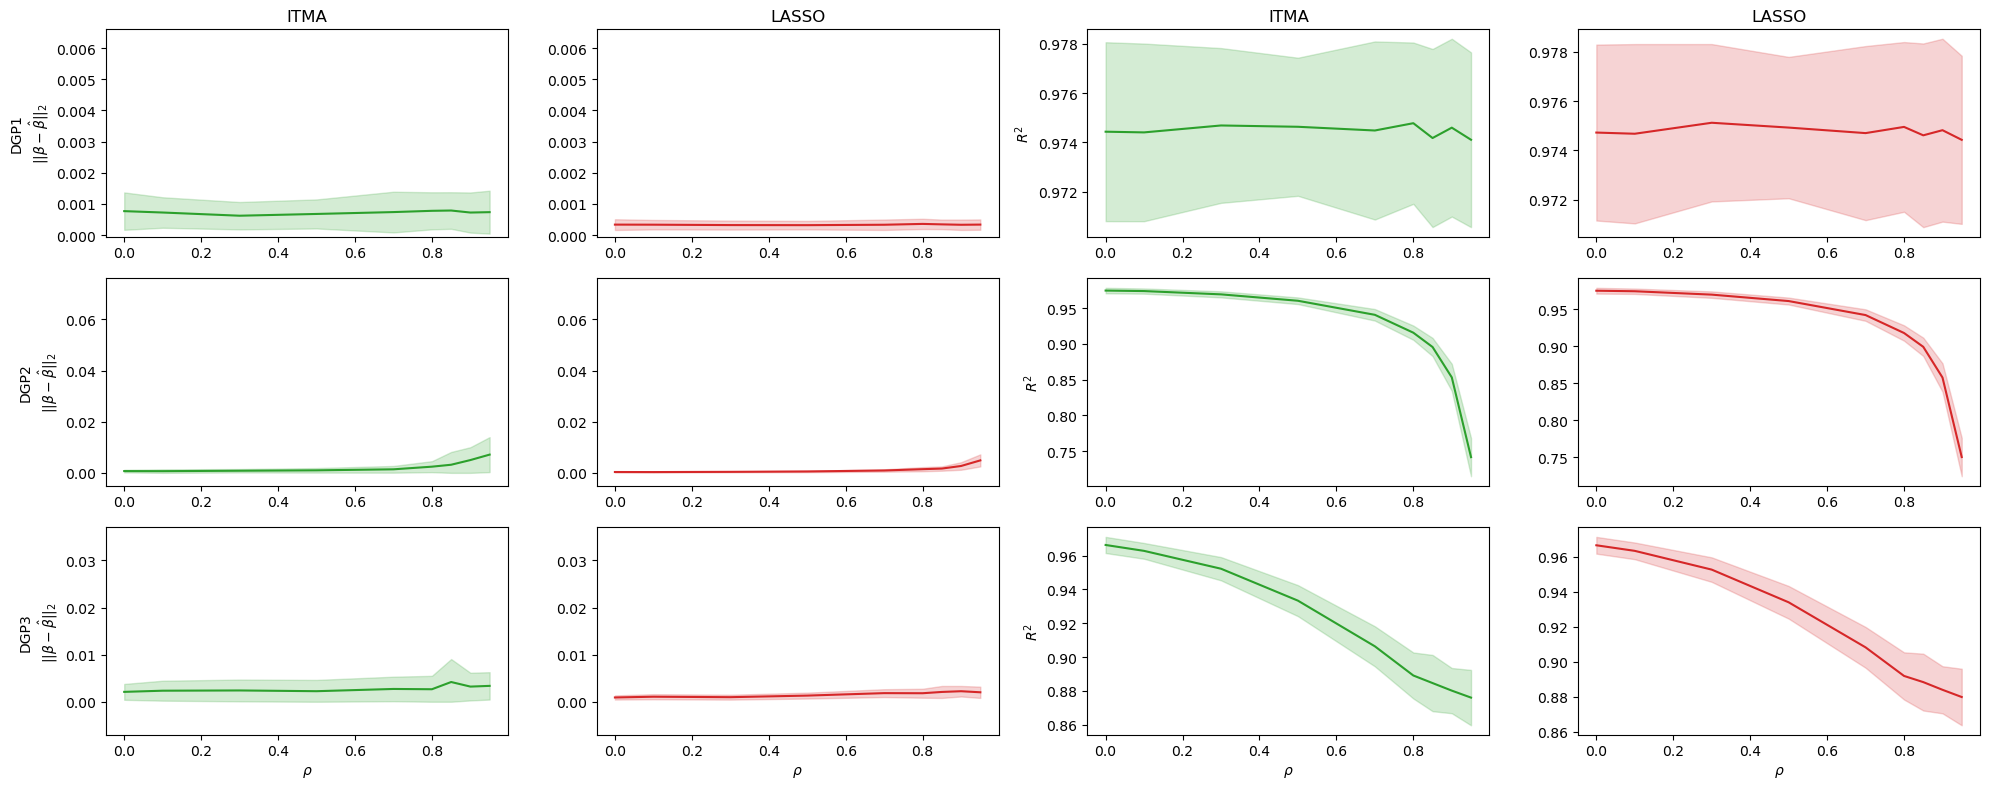

In [41]:
df = compare_df[(compare_df['n_obs'] == 500) & (compare_df['err_var'] == 1) & (compare_df['Model'] != 'PCA3') & (compare_df['Model'] != 'PCA5')].copy()

df['min'] = [max(0, i) for i in (df['coef_diff_avg'].values - np.sqrt(df['coef_diff_var'].values))]
df['max'] = df['coef_diff_avg'].values + np.sqrt(df['coef_diff_var'].values)


fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 8))



t_df = df[(df['Dataset'] == 'DGP1') & (df['Model'] == 'ITMA')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:green', ax=axs[0][0])
axs[0][0].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:green', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP1') & (df['Model'] == 'LASSO')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:red', ax=axs[0][1])
axs[0][1].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:red', alpha=0.2)

axs[0][0].set_xlabel('')
axs[0][1].set_xlabel('')
axs[0][0].set_ylabel('DGP1\n$||\\beta - \\hat{\\beta}||_2$')
axs[0][1].set_ylabel('')
axs[0][0].set_title('ITMA')
axs[0][1].set_title('LASSO')
axs[0][0].set_ylim((-0.00005, 0.0066))
axs[0][1].set_ylim((-0.00005, 0.0066))


t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'ITMA')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:green', ax=axs[1][0])
axs[1][0].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:green', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'LASSO')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:red', ax=axs[1][1])
axs[1][1].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:red', alpha=0.2)

axs[1][0].set_xlabel('')
axs[1][1].set_xlabel('')
axs[1][0].set_ylabel('DGP2\n$||\\beta - \\hat{\\beta}||_2$')
axs[1][1].set_ylabel('')
axs[1][0].set_ylim((-0.005, 0.076))
axs[1][1].set_ylim((-0.005, 0.076))


t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'ITMA')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:green', ax=axs[2][0])
axs[2][0].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:green', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'LASSO')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:red', ax=axs[2][1])
axs[2][1].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:red', alpha=0.2)

axs[2][0].set_xlabel('$\\rho$')
axs[2][1].set_xlabel('$\\rho$')
axs[2][0].set_ylabel('DGP3\n$||\\beta - \\hat{\\beta}||_2$')
axs[2][1].set_ylabel('')
axs[2][0].set_ylim((-0.007, 0.037))
axs[2][1].set_ylim((-0.007, 0.037))


##################################################################################
########################### R2 ###################################################
##################################################################################

df['min'] = [max(0, i) for i in (df['r2_avg'].values - np.sqrt(df['r2_var'].values))]
df['max'] = df['r2_avg'].values + np.sqrt(df['r2_var'].values)


t_df = df[(df['Dataset'] == 'DGP1') & (df['Model'] == 'ITMA')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:green', ax=axs[0][2])
axs[0][2].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:green', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP1') & (df['Model'] == 'LASSO')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:red', ax=axs[0][3])
axs[0][3].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:red', alpha=0.2)

axs[0][2].set_xlabel('')
axs[0][3].set_xlabel('')
axs[0][2].set_ylabel('$R^2$')
axs[0][3].set_ylabel('')
axs[0][2].set_title('ITMA')
axs[0][3].set_title('LASSO')
# axs[0][2].set_ylim((-0.00005, 0.0066))
# axs[0][3].set_ylim((-0.00005, 0.0066))


t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'ITMA')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:green', ax=axs[1][2])
axs[1][2].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:green', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'LASSO')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:red', ax=axs[1][3])
axs[1][3].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:red', alpha=0.2)

axs[1][2].set_xlabel('')
axs[1][3].set_xlabel('')
axs[1][2].set_ylabel('$R^2$')
axs[1][3].set_ylabel('')
# axs[1][0].set_ylim((-0.005, 0.076))
# axs[1][1].set_ylim((-0.005, 0.076))


t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'ITMA')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:green', ax=axs[2][2])
axs[2][2].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:green', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'LASSO')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:red', ax=axs[2][3])
axs[2][3].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:red', alpha=0.2)

axs[2][2].set_xlabel('$\\rho$')
axs[2][3].set_xlabel('$\\rho$')
axs[2][2].set_ylabel('$R^2$')
axs[2][3].set_ylabel('')
# axs[2][0].set_ylim((-0.007, 0.037))
# axs[2][1].set_ylim((-0.007, 0.037))



fig.tight_layout()

# plt.savefig('../Plots/6_cmp_ITMA_LASSO.pdf', bbox_inches='tight')


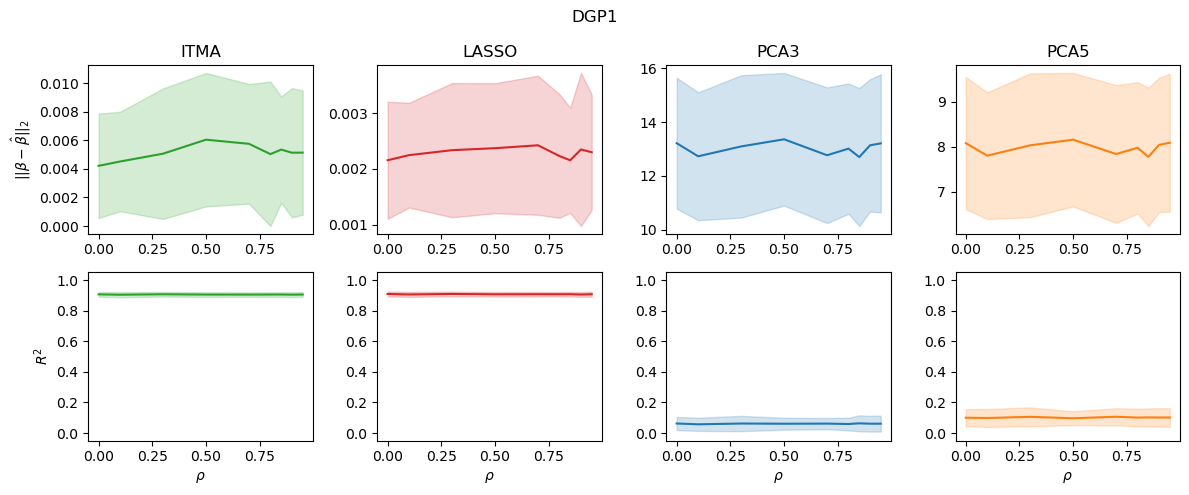

In [58]:
df = compare_df[(compare_df['n_obs'] == 300) & (compare_df['err_var'] == 1)].copy()


fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 5))


df['min'] = [max(0, i) for i in (df['coef_diff_avg'].values - np.sqrt(df['coef_diff_var'].values))]
df['max'] = df['coef_diff_avg'].values + np.sqrt(df['coef_diff_var'].values)

t_df = df[(df['Dataset'] == 'DGP1') & (df['Model'] == 'ITMA')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:green', ax=axs[0][0])
axs[0][0].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:green', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP1') & (df['Model'] == 'LASSO')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:red', ax=axs[0][1])
axs[0][1].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:red', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP1') & (df['Model'] == 'PCA3')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:blue', ax=axs[0][2])
axs[0][2].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:blue', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP1') & (df['Model'] == 'PCA5')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:orange', ax=axs[0][3])
axs[0][3].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:orange', alpha=0.2)

axs[0][0].set_xlabel('')
axs[0][1].set_xlabel('')
axs[0][2].set_xlabel('')
axs[0][3].set_xlabel('')

axs[0][0].set_ylabel('$||\\beta - \\hat{\\beta}||_2$')
axs[0][1].set_ylabel('')
axs[0][2].set_ylabel('')
axs[0][3].set_ylabel('')

axs[0][0].set_title('ITMA')
axs[0][1].set_title('LASSO')
axs[0][2].set_title('PCA3')
axs[0][3].set_title('PCA5')


#################################################
#################################################
#################################################


df['min'] = [max(0, i) for i in (df['r2_avg'].values - np.sqrt(df['r2_var'].values))]
df['max'] = df['r2_avg'].values + np.sqrt(df['r2_var'].values)

t_df = df[(df['Dataset'] == 'DGP1') & (df['Model'] == 'ITMA')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:green', ax=axs[1][0])
axs[1][0].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:green', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP1') & (df['Model'] == 'LASSO')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:red', ax=axs[1][1])
axs[1][1].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:red', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP1') & (df['Model'] == 'PCA3')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:blue', ax=axs[1][2])
axs[1][2].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:blue', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP1') & (df['Model'] == 'PCA5')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:orange', ax=axs[1][3])
axs[1][3].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:orange', alpha=0.2)

axs[1][0].set_xlabel('$\\rho$')
axs[1][1].set_xlabel('$\\rho$')
axs[1][2].set_xlabel('$\\rho$')
axs[1][3].set_xlabel('$\\rho$')

axs[1][0].set_ylabel('$R^2$')
axs[1][1].set_ylabel('')
axs[1][2].set_ylabel('')
axs[1][3].set_ylabel('')

axs[1][0].set_ylim((-0.05, 1.05))
axs[1][1].set_ylim((-0.05, 1.05))
axs[1][2].set_ylim((-0.05, 1.05))
axs[1][3].set_ylim((-0.05, 1.05))


fig.suptitle('DGP1')

fig.tight_layout()

# plt.savefig('../Plots/6_cmp_DGP1.pdf', bbox_inches='tight')


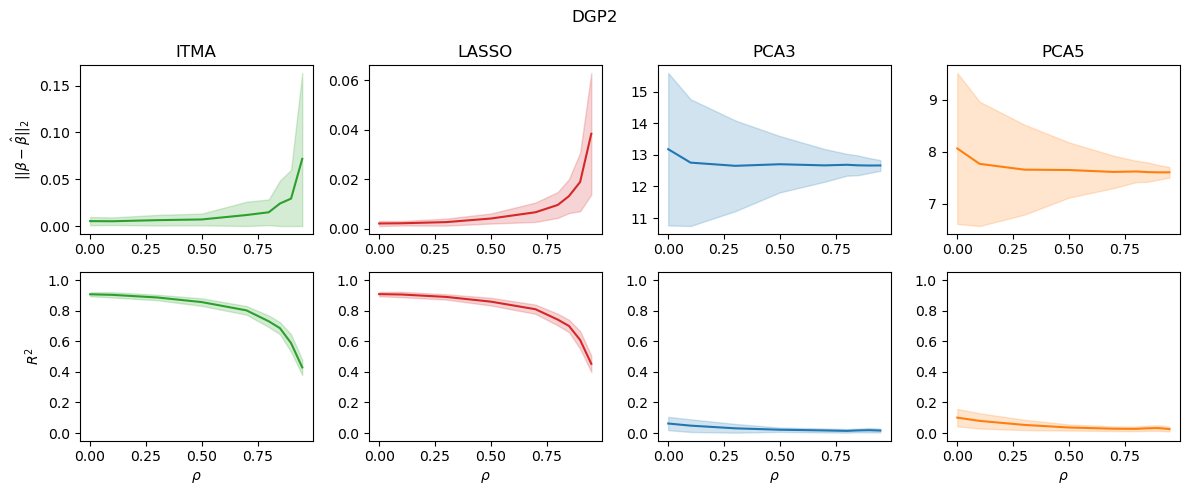

In [60]:
df = compare_df[(compare_df['n_obs'] == 300) & (compare_df['err_var'] == 1)].copy()


fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 5))


df['min'] = [max(0, i) for i in (df['coef_diff_avg'].values - np.sqrt(df['coef_diff_var'].values))]
df['max'] = df['coef_diff_avg'].values + np.sqrt(df['coef_diff_var'].values)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'ITMA')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:green', ax=axs[0][0])
axs[0][0].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:green', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'LASSO')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:red', ax=axs[0][1])
axs[0][1].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:red', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'PCA3')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:blue', ax=axs[0][2])
axs[0][2].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:blue', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'PCA5')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:orange', ax=axs[0][3])
axs[0][3].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:orange', alpha=0.2)

axs[0][0].set_xlabel('')
axs[0][1].set_xlabel('')
axs[0][2].set_xlabel('')
axs[0][3].set_xlabel('')

axs[0][0].set_ylabel('$||\\beta - \\hat{\\beta}||_2$')
axs[0][1].set_ylabel('')
axs[0][2].set_ylabel('')
axs[0][3].set_ylabel('')

axs[0][0].set_title('ITMA')
axs[0][1].set_title('LASSO')
axs[0][2].set_title('PCA3')
axs[0][3].set_title('PCA5')


#################################################
#################################################
#################################################


df['min'] = [max(0, i) for i in (df['r2_avg'].values - np.sqrt(df['r2_var'].values))]
df['max'] = df['r2_avg'].values + np.sqrt(df['r2_var'].values)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'ITMA')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:green', ax=axs[1][0])
axs[1][0].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:green', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'LASSO')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:red', ax=axs[1][1])
axs[1][1].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:red', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'PCA3')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:blue', ax=axs[1][2])
axs[1][2].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:blue', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'PCA5')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:orange', ax=axs[1][3])
axs[1][3].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:orange', alpha=0.2)

axs[1][0].set_xlabel('$\\rho$')
axs[1][1].set_xlabel('$\\rho$')
axs[1][2].set_xlabel('$\\rho$')
axs[1][3].set_xlabel('$\\rho$')

axs[1][0].set_ylabel('$R^2$')
axs[1][1].set_ylabel('')
axs[1][2].set_ylabel('')
axs[1][3].set_ylabel('')

axs[1][0].set_ylim((-0.05, 1.05))
axs[1][1].set_ylim((-0.05, 1.05))
axs[1][2].set_ylim((-0.05, 1.05))
axs[1][3].set_ylim((-0.05, 1.05))


fig.suptitle('DGP2')

fig.tight_layout()

plt.savefig('../Plots/6_cmp_DGP2.pdf', bbox_inches='tight')


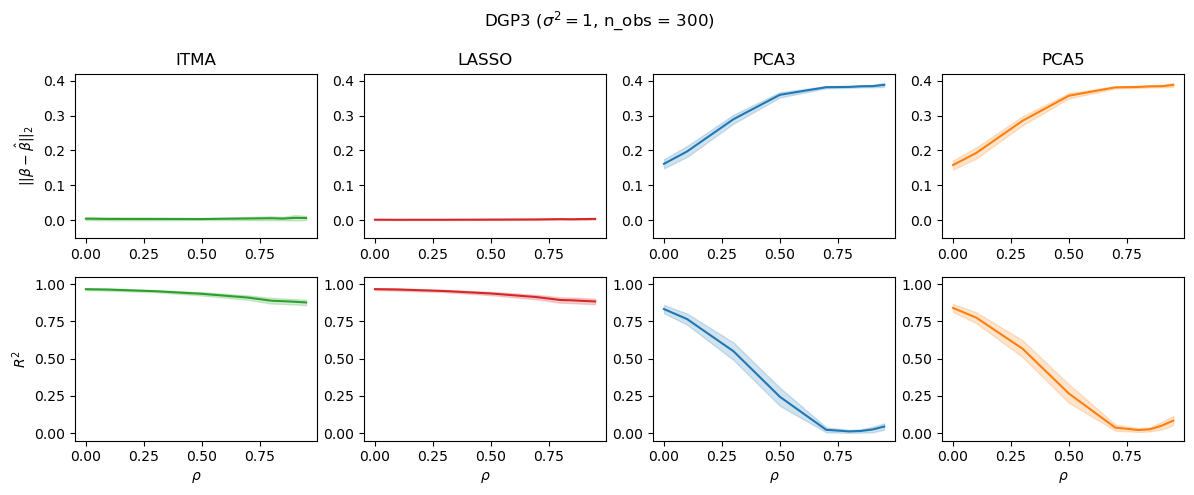

In [46]:
df = compare_df[(compare_df['n_obs'] == 300) & (compare_df['err_var'] == 1)].copy()


fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 5))


df['min'] = [max(0, i) for i in (df['coef_diff_avg'].values - np.sqrt(df['coef_diff_var'].values))]
df['max'] = df['coef_diff_avg'].values + np.sqrt(df['coef_diff_var'].values)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'ITMA')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:green', ax=axs[0][0])
axs[0][0].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:green', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'LASSO')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:red', ax=axs[0][1])
axs[0][1].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:red', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'PCA3')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:blue', ax=axs[0][2])
axs[0][2].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:blue', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'PCA5')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:orange', ax=axs[0][3])
axs[0][3].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:orange', alpha=0.2)

axs[0][0].set_xlabel('')
axs[0][1].set_xlabel('')
axs[0][2].set_xlabel('')
axs[0][3].set_xlabel('')

axs[0][0].set_ylabel('$||\\beta - \\hat{\\beta}||_2$')
axs[0][1].set_ylabel('')
axs[0][2].set_ylabel('')
axs[0][3].set_ylabel('')

axs[0][0].set_title('ITMA')
axs[0][1].set_title('LASSO')
axs[0][2].set_title('PCA3')
axs[0][3].set_title('PCA5')


axs[0][0].set_ylim((-0.05, 0.42))
axs[0][1].set_ylim((-0.05, 0.42))
axs[0][2].set_ylim((-0.05, 0.42))
axs[0][3].set_ylim((-0.05, 0.42))


#################################################
#################################################
#################################################


df['min'] = [max(0, i) for i in (df['r2_avg'].values - np.sqrt(df['r2_var'].values))]
df['max'] = df['r2_avg'].values + np.sqrt(df['r2_var'].values)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'ITMA')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:green', ax=axs[1][0])
axs[1][0].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:green', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'LASSO')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:red', ax=axs[1][1])
axs[1][1].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:red', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'PCA3')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:blue', ax=axs[1][2])
axs[1][2].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:blue', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'PCA5')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:orange', ax=axs[1][3])
axs[1][3].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:orange', alpha=0.2)

axs[1][0].set_xlabel('$\\rho$')
axs[1][1].set_xlabel('$\\rho$')
axs[1][2].set_xlabel('$\\rho$')
axs[1][3].set_xlabel('$\\rho$')

axs[1][0].set_ylabel('$R^2$')
axs[1][1].set_ylabel('')
axs[1][2].set_ylabel('')
axs[1][3].set_ylabel('')

axs[1][0].set_ylim((-0.05, 1.05))
axs[1][1].set_ylim((-0.05, 1.05))
axs[1][2].set_ylim((-0.05, 1.05))
axs[1][3].set_ylim((-0.05, 1.05))


fig.suptitle('DGP3 ($\\sigma^2 = 1$, n_obs = 300)')

fig.tight_layout()

plt.savefig('../Plots/6_cmp_DGP3_s1_n300.pdf', bbox_inches='tight')


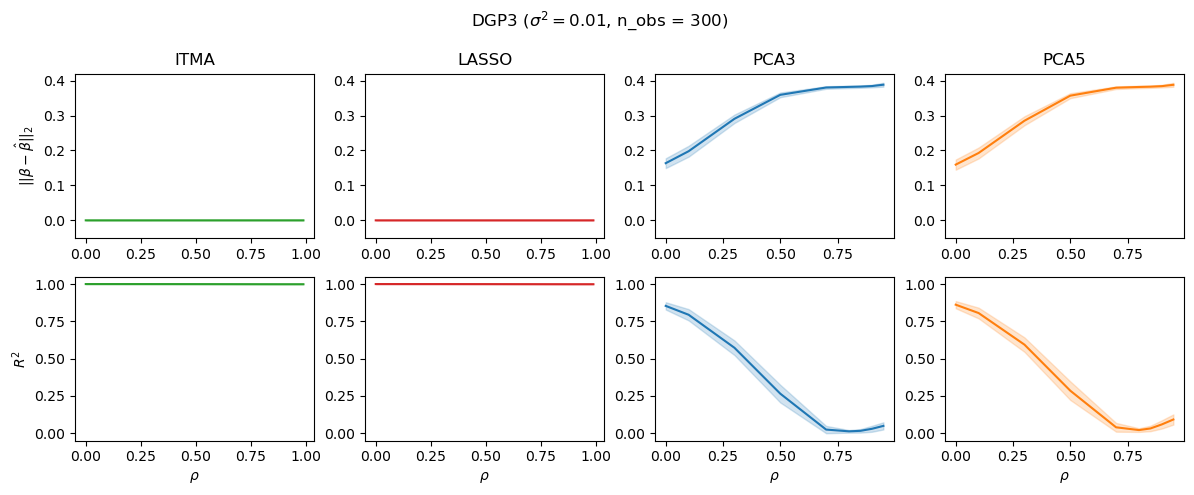

In [47]:
df = compare_df[(compare_df['n_obs'] == 300) & (compare_df['err_var'] == 0.01)].copy()


fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 5))


df['min'] = [max(0, i) for i in (df['coef_diff_avg'].values - np.sqrt(df['coef_diff_var'].values))]
df['max'] = df['coef_diff_avg'].values + np.sqrt(df['coef_diff_var'].values)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'ITMA')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:green', ax=axs[0][0])
axs[0][0].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:green', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'LASSO')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:red', ax=axs[0][1])
axs[0][1].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:red', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'PCA3')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:blue', ax=axs[0][2])
axs[0][2].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:blue', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'PCA5')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:orange', ax=axs[0][3])
axs[0][3].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:orange', alpha=0.2)

axs[0][0].set_xlabel('')
axs[0][1].set_xlabel('')
axs[0][2].set_xlabel('')
axs[0][3].set_xlabel('')

axs[0][0].set_ylabel('$||\\beta - \\hat{\\beta}||_2$')
axs[0][1].set_ylabel('')
axs[0][2].set_ylabel('')
axs[0][3].set_ylabel('')

axs[0][0].set_title('ITMA')
axs[0][1].set_title('LASSO')
axs[0][2].set_title('PCA3')
axs[0][3].set_title('PCA5')

axs[0][0].set_ylim((-0.05, 0.42))
axs[0][1].set_ylim((-0.05, 0.42))
axs[0][2].set_ylim((-0.05, 0.42))
axs[0][3].set_ylim((-0.05, 0.42))


#################################################
#################################################
#################################################


df['min'] = [max(0, i) for i in (df['r2_avg'].values - np.sqrt(df['r2_var'].values))]
df['max'] = df['r2_avg'].values + np.sqrt(df['r2_var'].values)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'ITMA')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:green', ax=axs[1][0])
axs[1][0].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:green', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'LASSO')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:red', ax=axs[1][1])
axs[1][1].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:red', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'PCA3')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:blue', ax=axs[1][2])
axs[1][2].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:blue', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'PCA5')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:orange', ax=axs[1][3])
axs[1][3].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:orange', alpha=0.2)

axs[1][0].set_xlabel('$\\rho$')
axs[1][1].set_xlabel('$\\rho$')
axs[1][2].set_xlabel('$\\rho$')
axs[1][3].set_xlabel('$\\rho$')

axs[1][0].set_ylabel('$R^2$')
axs[1][1].set_ylabel('')
axs[1][2].set_ylabel('')
axs[1][3].set_ylabel('')

axs[1][0].set_ylim((-0.05, 1.05))
axs[1][1].set_ylim((-0.05, 1.05))
axs[1][2].set_ylim((-0.05, 1.05))
axs[1][3].set_ylim((-0.05, 1.05))


fig.suptitle('DGP3 ($\\sigma^2 = 0.01$, n_obs = 300)')

fig.tight_layout()

plt.savefig('../Plots/6_cmp_DGP3_s0-01_n300.pdf', bbox_inches='tight')


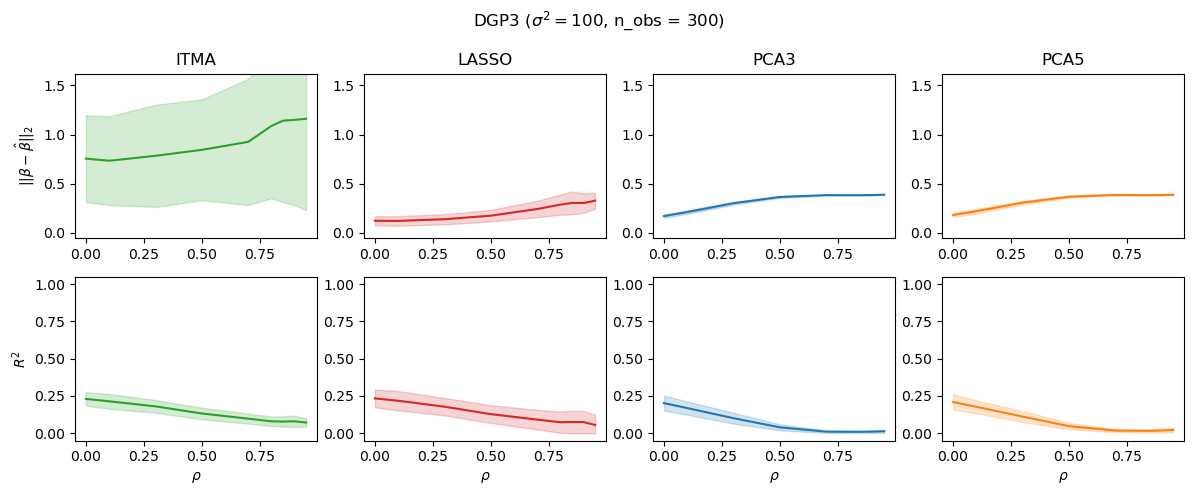

In [50]:
df = compare_df[(compare_df['n_obs'] == 300) & (compare_df['err_var'] == 100)].copy()


fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 5))


df['min'] = [max(0, i) for i in (df['coef_diff_avg'].values - np.sqrt(df['coef_diff_var'].values))]
df['max'] = df['coef_diff_avg'].values + np.sqrt(df['coef_diff_var'].values)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'ITMA')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:green', ax=axs[0][0])
axs[0][0].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:green', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'LASSO')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:red', ax=axs[0][1])
axs[0][1].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:red', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'PCA3')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:blue', ax=axs[0][2])
axs[0][2].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:blue', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'PCA5')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:orange', ax=axs[0][3])
axs[0][3].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:orange', alpha=0.2)

axs[0][0].set_xlabel('')
axs[0][1].set_xlabel('')
axs[0][2].set_xlabel('')
axs[0][3].set_xlabel('')

axs[0][0].set_ylabel('$||\\beta - \\hat{\\beta}||_2$')
axs[0][1].set_ylabel('')
axs[0][2].set_ylabel('')
axs[0][3].set_ylabel('')

axs[0][0].set_title('ITMA')
axs[0][1].set_title('LASSO')
axs[0][2].set_title('PCA3')
axs[0][3].set_title('PCA5')

axs[0][0].set_ylim((-0.05, 1.62))
axs[0][1].set_ylim((-0.05, 1.62))
axs[0][2].set_ylim((-0.05, 1.62))
axs[0][3].set_ylim((-0.05, 1.62))


#################################################
#################################################
#################################################


df['min'] = [max(0, i) for i in (df['r2_avg'].values - np.sqrt(df['r2_var'].values))]
df['max'] = df['r2_avg'].values + np.sqrt(df['r2_var'].values)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'ITMA')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:green', ax=axs[1][0])
axs[1][0].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:green', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'LASSO')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:red', ax=axs[1][1])
axs[1][1].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:red', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'PCA3')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:blue', ax=axs[1][2])
axs[1][2].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:blue', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP3') & (df['Model'] == 'PCA5')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:orange', ax=axs[1][3])
axs[1][3].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:orange', alpha=0.2)

axs[1][0].set_xlabel('$\\rho$')
axs[1][1].set_xlabel('$\\rho$')
axs[1][2].set_xlabel('$\\rho$')
axs[1][3].set_xlabel('$\\rho$')

axs[1][0].set_ylabel('$R^2$')
axs[1][1].set_ylabel('')
axs[1][2].set_ylabel('')
axs[1][3].set_ylabel('')

axs[1][0].set_ylim((-0.05, 1.05))
axs[1][1].set_ylim((-0.05, 1.05))
axs[1][2].set_ylim((-0.05, 1.05))
axs[1][3].set_ylim((-0.05, 1.05))


fig.suptitle('DGP3 ($\\sigma^2 = 100$, n_obs = 300)')

fig.tight_layout()

plt.savefig('../Plots/6_cmp_DGP3_s100_n300.pdf', bbox_inches='tight')


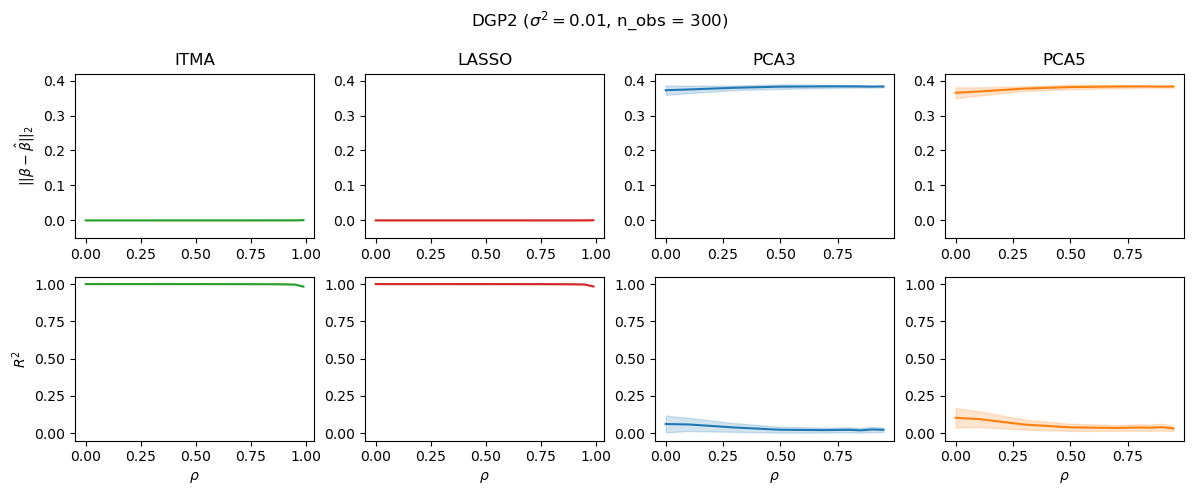

In [51]:
df = compare_df[(compare_df['n_obs'] == 300) & (compare_df['err_var'] == 0.01)].copy()


fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 5))


df['min'] = [max(0, i) for i in (df['coef_diff_avg'].values - np.sqrt(df['coef_diff_var'].values))]
df['max'] = df['coef_diff_avg'].values + np.sqrt(df['coef_diff_var'].values)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'ITMA')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:green', ax=axs[0][0])
axs[0][0].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:green', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'LASSO')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:red', ax=axs[0][1])
axs[0][1].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:red', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'PCA3')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:blue', ax=axs[0][2])
axs[0][2].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:blue', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'PCA5')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:orange', ax=axs[0][3])
axs[0][3].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:orange', alpha=0.2)

axs[0][0].set_xlabel('')
axs[0][1].set_xlabel('')
axs[0][2].set_xlabel('')
axs[0][3].set_xlabel('')

axs[0][0].set_ylabel('$||\\beta - \\hat{\\beta}||_2$')
axs[0][1].set_ylabel('')
axs[0][2].set_ylabel('')
axs[0][3].set_ylabel('')

axs[0][0].set_title('ITMA')
axs[0][1].set_title('LASSO')
axs[0][2].set_title('PCA3')
axs[0][3].set_title('PCA5')

axs[0][0].set_ylim((-0.05, 0.42))
axs[0][1].set_ylim((-0.05, 0.42))
axs[0][2].set_ylim((-0.05, 0.42))
axs[0][3].set_ylim((-0.05, 0.42))

#################################################
#################################################
#################################################


df['min'] = [max(0, i) for i in (df['r2_avg'].values - np.sqrt(df['r2_var'].values))]
df['max'] = df['r2_avg'].values + np.sqrt(df['r2_var'].values)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'ITMA')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:green', ax=axs[1][0])
axs[1][0].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:green', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'LASSO')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:red', ax=axs[1][1])
axs[1][1].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:red', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'PCA3')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:blue', ax=axs[1][2])
axs[1][2].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:blue', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'PCA5')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:orange', ax=axs[1][3])
axs[1][3].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:orange', alpha=0.2)

axs[1][0].set_xlabel('$\\rho$')
axs[1][1].set_xlabel('$\\rho$')
axs[1][2].set_xlabel('$\\rho$')
axs[1][3].set_xlabel('$\\rho$')

axs[1][0].set_ylabel('$R^2$')
axs[1][1].set_ylabel('')
axs[1][2].set_ylabel('')
axs[1][3].set_ylabel('')

axs[1][0].set_ylim((-0.05, 1.05))
axs[1][1].set_ylim((-0.05, 1.05))
axs[1][2].set_ylim((-0.05, 1.05))
axs[1][3].set_ylim((-0.05, 1.05))


fig.suptitle('DGP2 ($\\sigma^2 = 0.01$, n_obs = 300)')

fig.tight_layout()

plt.savefig('../Plots/6_cmp_DGP2_s0-01_n300.pdf', bbox_inches='tight')


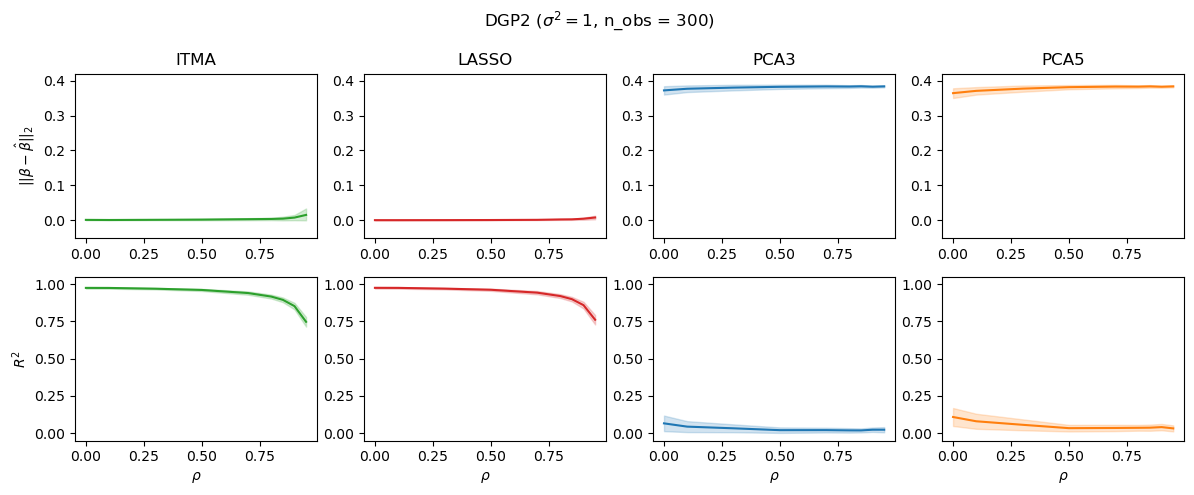

In [52]:
df = compare_df[(compare_df['n_obs'] == 300) & (compare_df['err_var'] == 1)].copy()


fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 5))


df['min'] = [max(0, i) for i in (df['coef_diff_avg'].values - np.sqrt(df['coef_diff_var'].values))]
df['max'] = df['coef_diff_avg'].values + np.sqrt(df['coef_diff_var'].values)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'ITMA')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:green', ax=axs[0][0])
axs[0][0].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:green', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'LASSO')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:red', ax=axs[0][1])
axs[0][1].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:red', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'PCA3')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:blue', ax=axs[0][2])
axs[0][2].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:blue', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'PCA5')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:orange', ax=axs[0][3])
axs[0][3].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:orange', alpha=0.2)

axs[0][0].set_xlabel('')
axs[0][1].set_xlabel('')
axs[0][2].set_xlabel('')
axs[0][3].set_xlabel('')

axs[0][0].set_ylabel('$||\\beta - \\hat{\\beta}||_2$')
axs[0][1].set_ylabel('')
axs[0][2].set_ylabel('')
axs[0][3].set_ylabel('')

axs[0][0].set_title('ITMA')
axs[0][1].set_title('LASSO')
axs[0][2].set_title('PCA3')
axs[0][3].set_title('PCA5')


axs[0][0].set_ylim((-0.05, 0.42))
axs[0][1].set_ylim((-0.05, 0.42))
axs[0][2].set_ylim((-0.05, 0.42))
axs[0][3].set_ylim((-0.05, 0.42))


#################################################
#################################################
#################################################


df['min'] = [max(0, i) for i in (df['r2_avg'].values - np.sqrt(df['r2_var'].values))]
df['max'] = df['r2_avg'].values + np.sqrt(df['r2_var'].values)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'ITMA')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:green', ax=axs[1][0])
axs[1][0].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:green', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'LASSO')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:red', ax=axs[1][1])
axs[1][1].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:red', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'PCA3')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:blue', ax=axs[1][2])
axs[1][2].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:blue', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'PCA5')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:orange', ax=axs[1][3])
axs[1][3].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:orange', alpha=0.2)

axs[1][0].set_xlabel('$\\rho$')
axs[1][1].set_xlabel('$\\rho$')
axs[1][2].set_xlabel('$\\rho$')
axs[1][3].set_xlabel('$\\rho$')

axs[1][0].set_ylabel('$R^2$')
axs[1][1].set_ylabel('')
axs[1][2].set_ylabel('')
axs[1][3].set_ylabel('')

axs[1][0].set_ylim((-0.05, 1.05))
axs[1][1].set_ylim((-0.05, 1.05))
axs[1][2].set_ylim((-0.05, 1.05))
axs[1][3].set_ylim((-0.05, 1.05))


fig.suptitle('DGP2 ($\\sigma^2 = 1$, n_obs = 300)')

fig.tight_layout()

plt.savefig('../Plots/6_cmp_DGP2_s1_n300.pdf', bbox_inches='tight')


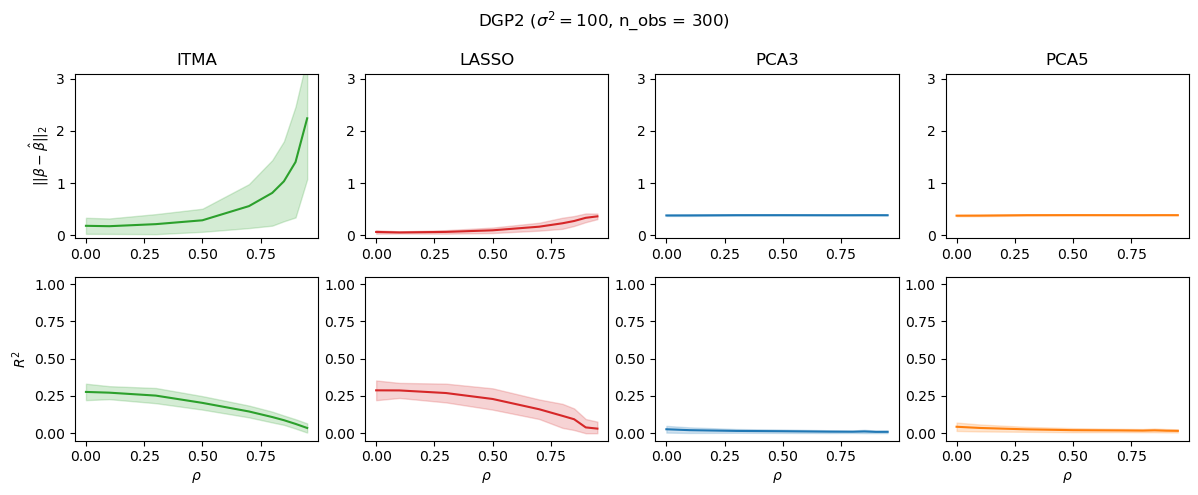

In [53]:
df = compare_df[(compare_df['n_obs'] == 300) & (compare_df['err_var'] == 100)].copy()


fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 5))


df['min'] = [max(0, i) for i in (df['coef_diff_avg'].values - np.sqrt(df['coef_diff_var'].values))]
df['max'] = df['coef_diff_avg'].values + np.sqrt(df['coef_diff_var'].values)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'ITMA')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:green', ax=axs[0][0])
axs[0][0].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:green', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'LASSO')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:red', ax=axs[0][1])
axs[0][1].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:red', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'PCA3')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:blue', ax=axs[0][2])
axs[0][2].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:blue', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'PCA5')]
sns.lineplot(data=t_df, x='rho', y='coef_diff_avg', color='tab:orange', ax=axs[0][3])
axs[0][3].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:orange', alpha=0.2)

axs[0][0].set_xlabel('')
axs[0][1].set_xlabel('')
axs[0][2].set_xlabel('')
axs[0][3].set_xlabel('')

axs[0][0].set_ylabel('$||\\beta - \\hat{\\beta}||_2$')
axs[0][1].set_ylabel('')
axs[0][2].set_ylabel('')
axs[0][3].set_ylabel('')

axs[0][0].set_title('ITMA')
axs[0][1].set_title('LASSO')
axs[0][2].set_title('PCA3')
axs[0][3].set_title('PCA5')

axs[0][0].set_ylim((-0.05, 3.1))
axs[0][1].set_ylim((-0.05, 3.1))
axs[0][2].set_ylim((-0.05, 3.1))
axs[0][3].set_ylim((-0.05, 3.1))


#################################################
#################################################
#################################################


df['min'] = [max(0, i) for i in (df['r2_avg'].values - np.sqrt(df['r2_var'].values))]
df['max'] = df['r2_avg'].values + np.sqrt(df['r2_var'].values)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'ITMA')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:green', ax=axs[1][0])
axs[1][0].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:green', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'LASSO')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:red', ax=axs[1][1])
axs[1][1].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:red', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'PCA3')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:blue', ax=axs[1][2])
axs[1][2].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:blue', alpha=0.2)

t_df = df[(df['Dataset'] == 'DGP2') & (df['Model'] == 'PCA5')]
sns.lineplot(data=t_df, x='rho', y='r2_avg', color='tab:orange', ax=axs[1][3])
axs[1][3].fill_between(t_df['rho'], t_df['min'], t_df['max'], color='tab:orange', alpha=0.2)

axs[1][0].set_xlabel('$\\rho$')
axs[1][1].set_xlabel('$\\rho$')
axs[1][2].set_xlabel('$\\rho$')
axs[1][3].set_xlabel('$\\rho$')

axs[1][0].set_ylabel('$R^2$')
axs[1][1].set_ylabel('')
axs[1][2].set_ylabel('')
axs[1][3].set_ylabel('')

axs[1][0].set_ylim((-0.05, 1.05))
axs[1][1].set_ylim((-0.05, 1.05))
axs[1][2].set_ylim((-0.05, 1.05))
axs[1][3].set_ylim((-0.05, 1.05))


fig.suptitle('DGP2 ($\\sigma^2 = 100$, n_obs = 300)')

fig.tight_layout()

plt.savefig('../Plots/6_cmp_DGP2_s100_n300.pdf', bbox_inches='tight')


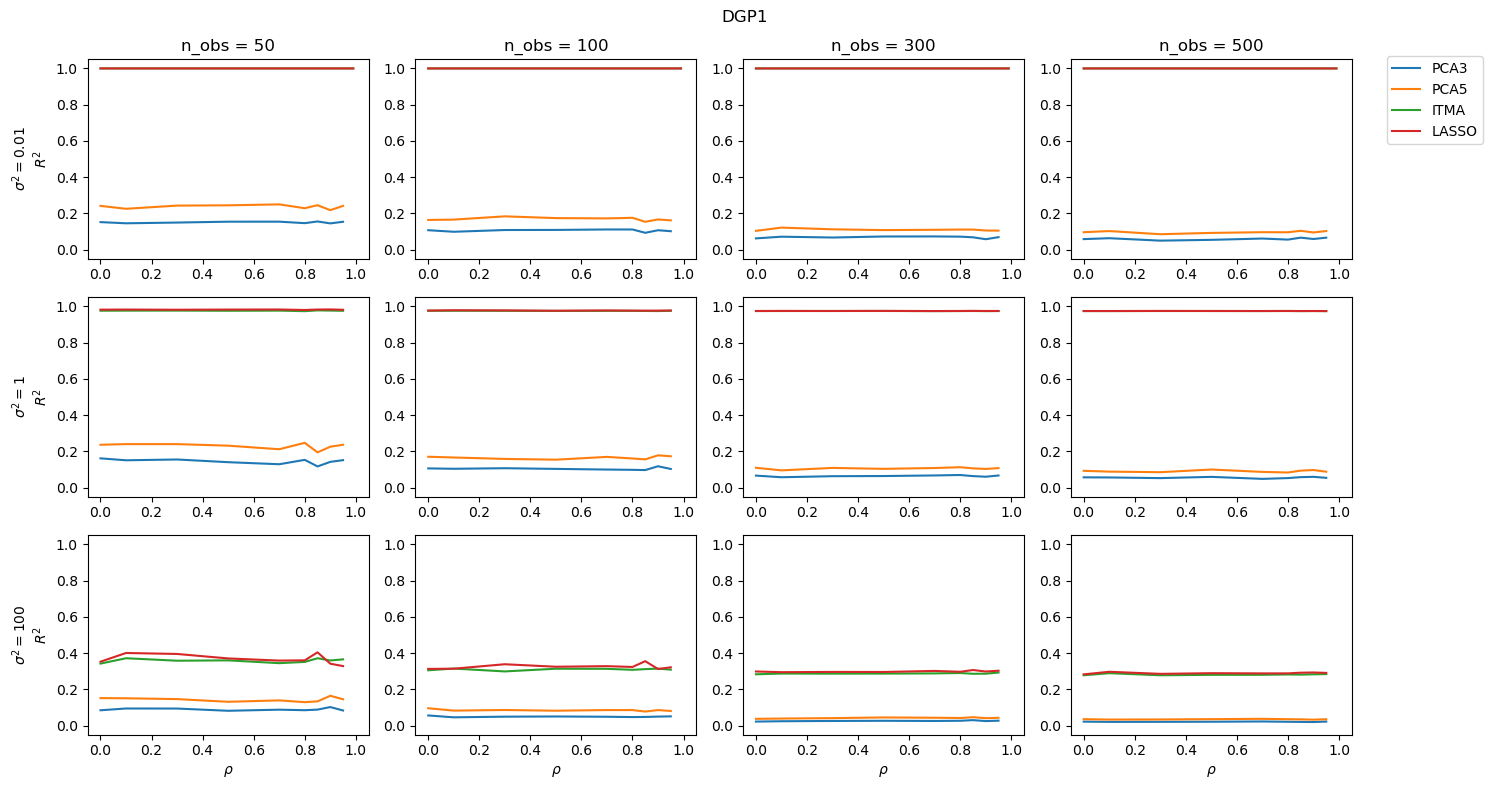

In [54]:
dgp = 'DGP1'

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 8))

setups = [[(n, v) for n in (50, 100, 300, 500)] for v in (0.01, 1, 100)]

for i in range(3):
    for j in range(4):
        ax = axs[i][j]
        n, var = setups[i][j]

        sns.lineplot(
            data=compare_df[(compare_df['Dataset'] == dgp) & (compare_df['err_var']==var) & (compare_df['n_obs'] == n)],
            x = 'rho', y = 'r2_avg', hue='Model', ax=ax
        )
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_ylim((-0.05, 1.05))
        ax.set_xlim((-0.05, 1.05))
        if (i != 0) or (j != 3):
            ax.get_legend().remove()


axs[2][0].set_xlabel('$\\rho$')
axs[2][1].set_xlabel('$\\rho$')
axs[2][2].set_xlabel('$\\rho$')
axs[2][3].set_xlabel('$\\rho$')

axs[0][0].set_title('n_obs = 50')
axs[0][1].set_title('n_obs = 100')
axs[0][2].set_title('n_obs = 300')
axs[0][3].set_title('n_obs = 500')


axs[0][0].set_ylabel('$\\sigma^2 = 0.01$\n$R^2$')
axs[1][0].set_ylabel('$\\sigma^2 = 1$\n$R^2$')
axs[2][0].set_ylabel('$\\sigma^2 = 100$\n$R^2$')

axs[0][3].legend(bbox_to_anchor=(1.1, 1.05))

fig.suptitle(dgp)
fig.tight_layout()

plt.savefig(f'../Plots/6_cmp_all_{dgp}.pdf', bbox_inches='tight')


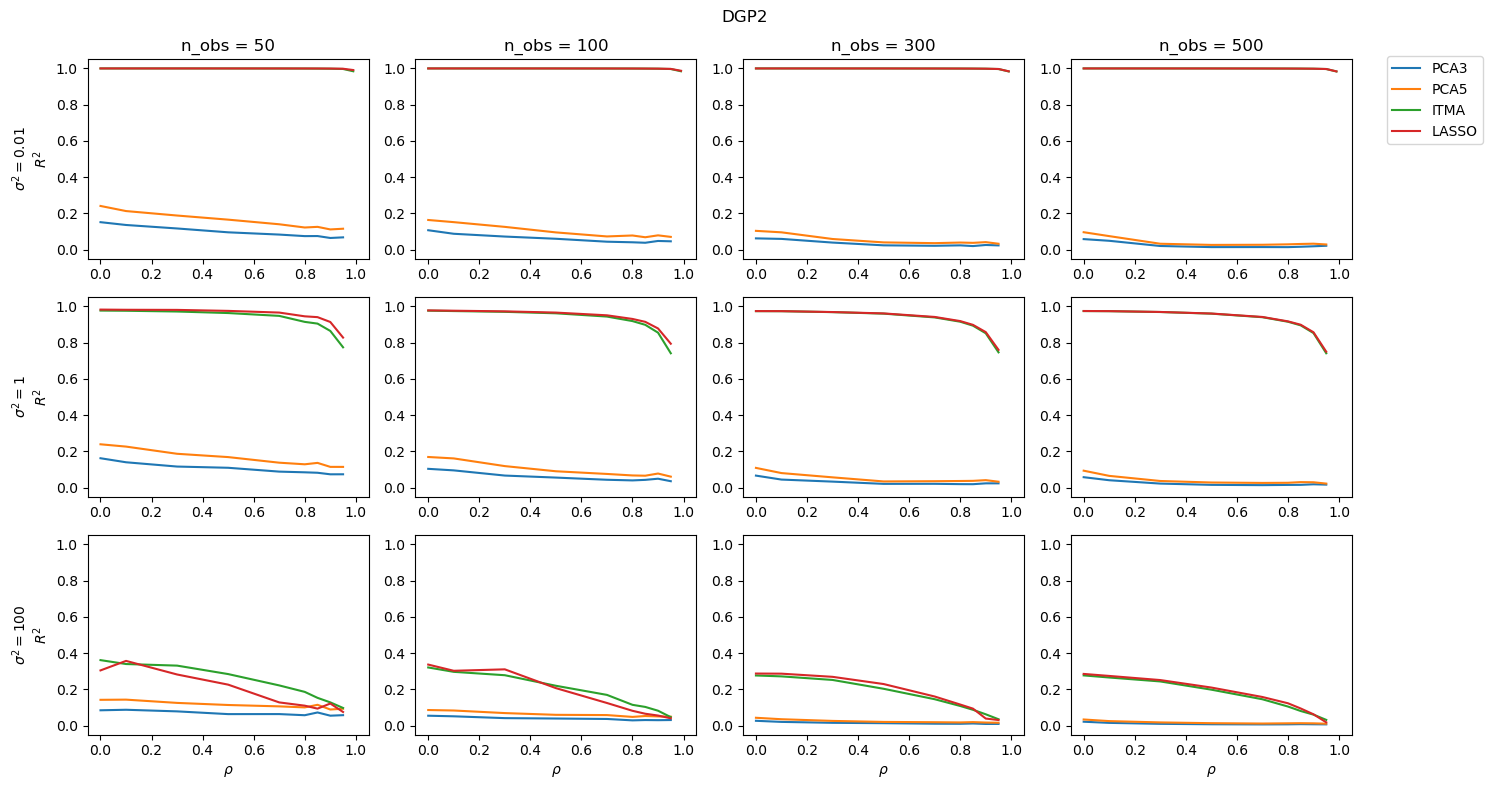

In [55]:
dgp = 'DGP2'

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 8))

setups = [[(n, v) for n in (50, 100, 300, 500)] for v in (0.01, 1, 100)]

for i in range(3):
    for j in range(4):
        ax = axs[i][j]
        n, var = setups[i][j]

        sns.lineplot(
            data=compare_df[(compare_df['Dataset'] == dgp) & (compare_df['err_var']==var) & (compare_df['n_obs'] == n)],
            x = 'rho', y = 'r2_avg', hue='Model', ax=ax
        )
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_ylim((-0.05, 1.05))
        ax.set_xlim((-0.05, 1.05))
        if (i != 0) or (j != 3):
            ax.get_legend().remove()


axs[2][0].set_xlabel('$\\rho$')
axs[2][1].set_xlabel('$\\rho$')
axs[2][2].set_xlabel('$\\rho$')
axs[2][3].set_xlabel('$\\rho$')

axs[0][0].set_title('n_obs = 50')
axs[0][1].set_title('n_obs = 100')
axs[0][2].set_title('n_obs = 300')
axs[0][3].set_title('n_obs = 500')


axs[0][0].set_ylabel('$\\sigma^2 = 0.01$\n$R^2$')
axs[1][0].set_ylabel('$\\sigma^2 = 1$\n$R^2$')
axs[2][0].set_ylabel('$\\sigma^2 = 100$\n$R^2$')

axs[0][3].legend(bbox_to_anchor=(1.1, 1.05))

fig.suptitle(dgp)
fig.tight_layout()

plt.savefig(f'../Plots/6_cmp_all_{dgp}.pdf', bbox_inches='tight')


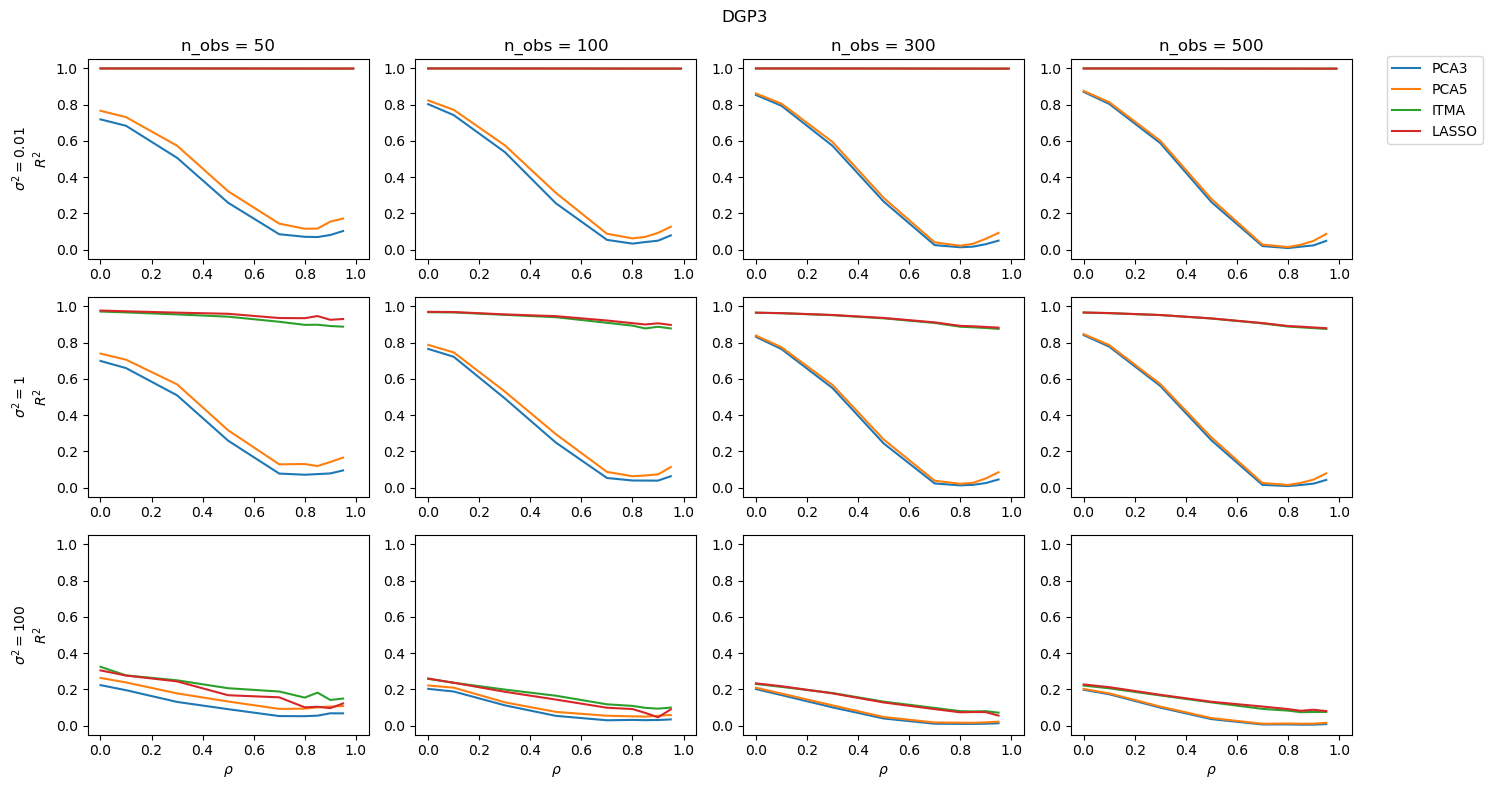

In [56]:
dgp = 'DGP3'

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 8))

setups = [[(n, v) for n in (50, 100, 300, 500)] for v in (0.01, 1, 100)]

for i in range(3):
    for j in range(4):
        ax = axs[i][j]
        n, var = setups[i][j]

        sns.lineplot(
            data=compare_df[(compare_df['Dataset'] == dgp) & (compare_df['err_var']==var) & (compare_df['n_obs'] == n)],
            x = 'rho', y = 'r2_avg', hue='Model', ax=ax
        )
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_ylim((-0.05, 1.05))
        ax.set_xlim((-0.05, 1.05))
        if (i != 0) or (j != 3):
            ax.get_legend().remove()


axs[2][0].set_xlabel('$\\rho$')
axs[2][1].set_xlabel('$\\rho$')
axs[2][2].set_xlabel('$\\rho$')
axs[2][3].set_xlabel('$\\rho$')

axs[0][0].set_title('n_obs = 50')
axs[0][1].set_title('n_obs = 100')
axs[0][2].set_title('n_obs = 300')
axs[0][3].set_title('n_obs = 500')


axs[0][0].set_ylabel('$\\sigma^2 = 0.01$\n$R^2$')
axs[1][0].set_ylabel('$\\sigma^2 = 1$\n$R^2$')
axs[2][0].set_ylabel('$\\sigma^2 = 100$\n$R^2$')

axs[0][3].legend(bbox_to_anchor=(1.1, 1.05))

fig.suptitle(dgp)
fig.tight_layout()

plt.savefig(f'../Plots/6_cmp_all_{dgp}.pdf', bbox_inches='tight')


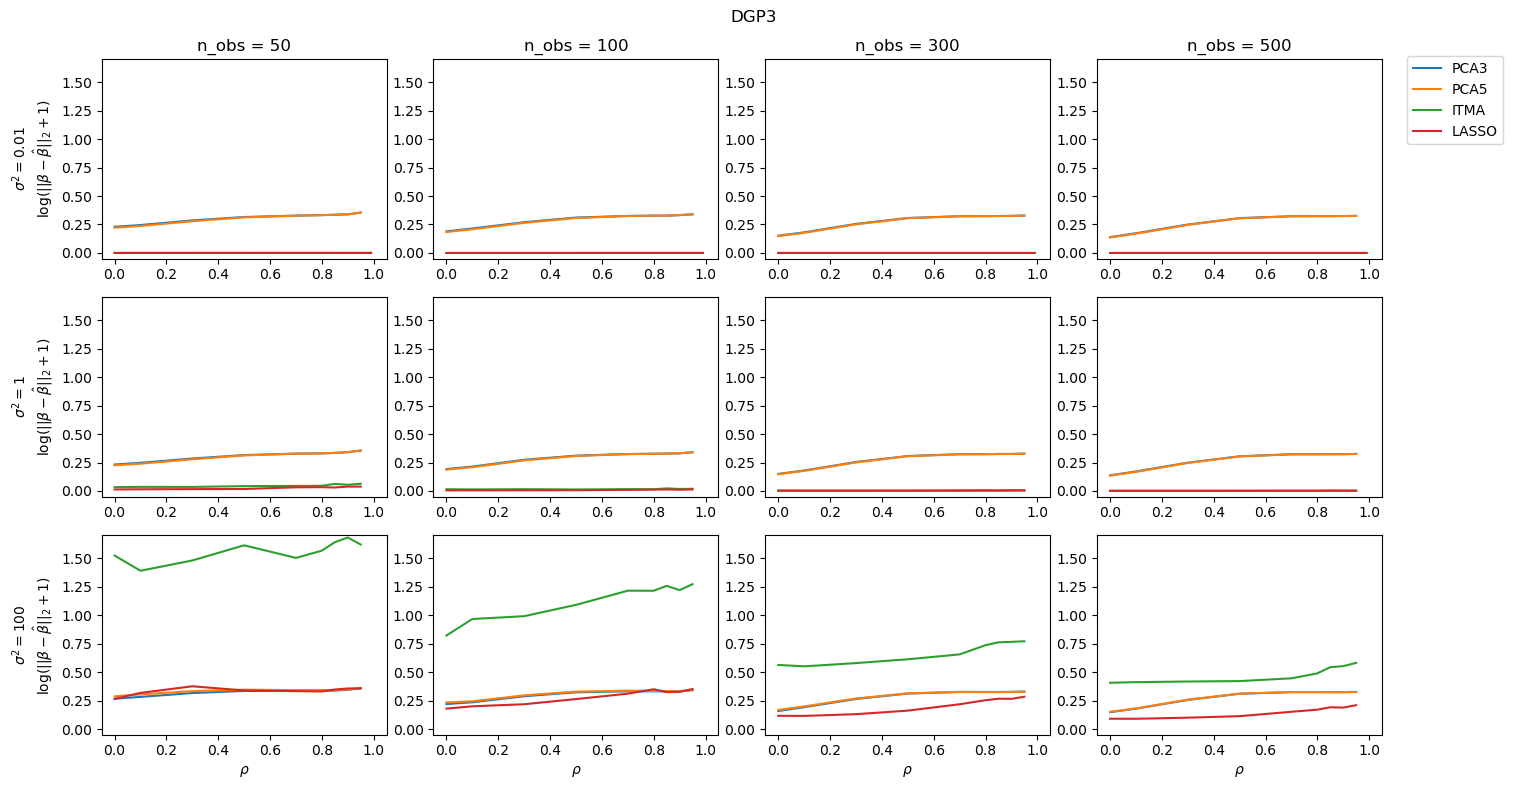

In [7]:
dgp = 'DGP3'

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 8))

setups = [[(n, v) for n in (50, 100, 300, 500)] for v in (0.01, 1, 100)]

for i in range(3):
    for j in range(4):
        ax = axs[i][j]
        n, var = setups[i][j]
        df = compare_df[(compare_df['Dataset'] == dgp) & (compare_df['err_var']==var) & (compare_df['n_obs'] == n)].copy()
        df['coef_diff'] = np.log(df['coef_diff_avg'] + 1)
        sns.lineplot(
            data=df,
            x = 'rho', y = 'coef_diff', hue='Model', ax=ax
        )
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_ylim((-0.05, 1.7))
        ax.set_xlim((-0.05, 1.05))
        if (i != 0) or (j != 3):
            ax.get_legend().remove()


axs[2][0].set_xlabel('$\\rho$')
axs[2][1].set_xlabel('$\\rho$')
axs[2][2].set_xlabel('$\\rho$')
axs[2][3].set_xlabel('$\\rho$')

axs[0][0].set_title('n_obs = 50')
axs[0][1].set_title('n_obs = 100')
axs[0][2].set_title('n_obs = 300')
axs[0][3].set_title('n_obs = 500')


axs[0][0].set_ylabel('$\\sigma^2 = 0.01$\n$\\log(||\\beta - \\hat{\\beta}||_2 + 1)$')
axs[1][0].set_ylabel('$\\sigma^2 = 1$\n$\\log(||\\beta - \\hat{\\beta}||_2 + 1)$')
axs[2][0].set_ylabel('$\\sigma^2 = 100$\n$\\log(||\\beta - \\hat{\\beta}||_2 + 1)$')

axs[0][3].legend(bbox_to_anchor=(1.45, 1.05))

fig.suptitle(dgp)
fig.tight_layout()

plt.savefig(f'../Plots/6_cmp_all_{dgp}_ceof_diff.pdf', bbox_inches='tight')


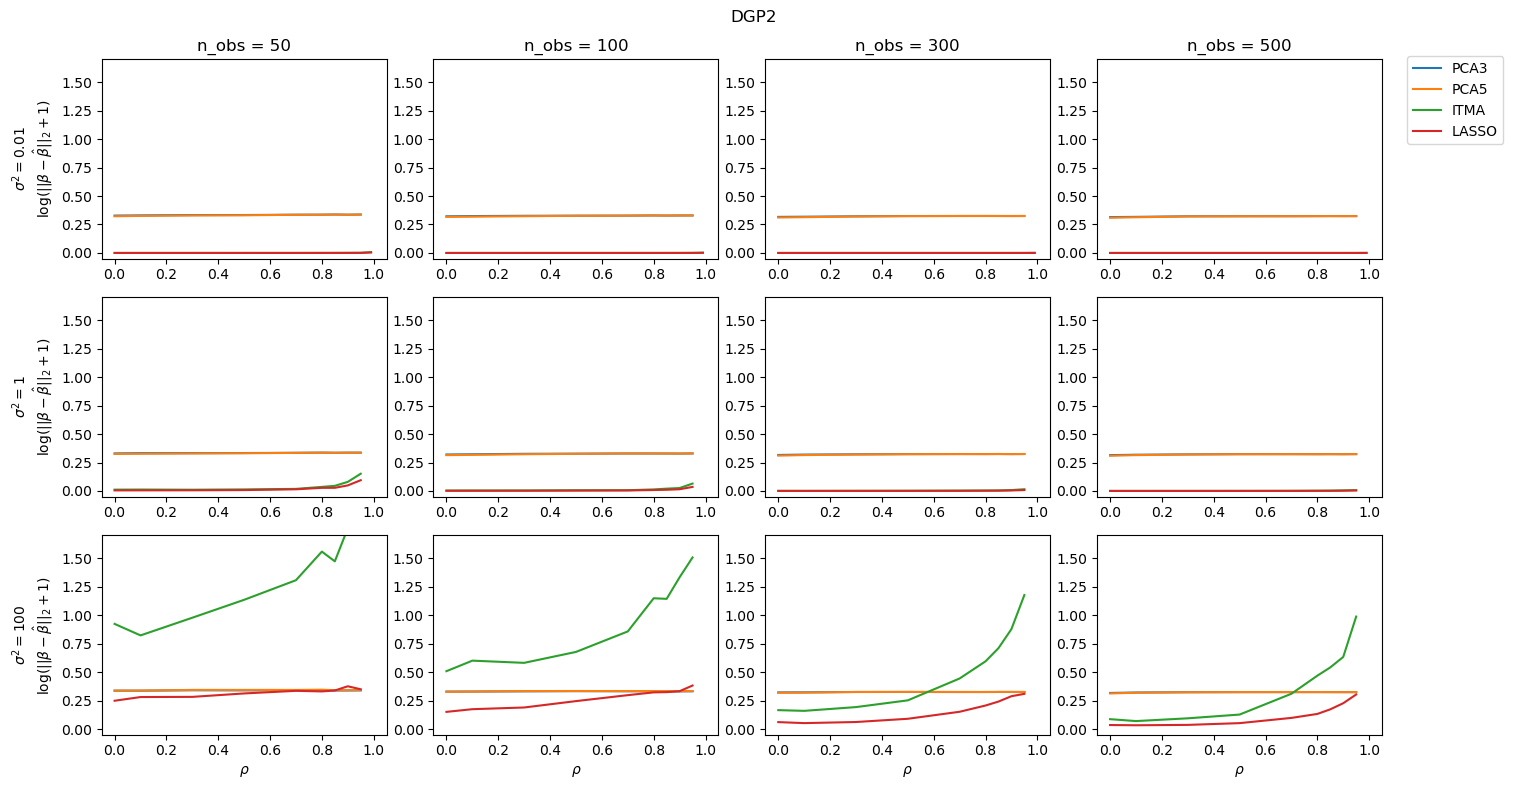

In [8]:
dgp = 'DGP2'

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 8))

setups = [[(n, v) for n in (50, 100, 300, 500)] for v in (0.01, 1, 100)]

for i in range(3):
    for j in range(4):
        ax = axs[i][j]
        n, var = setups[i][j]
        df = compare_df[(compare_df['Dataset'] == dgp) & (compare_df['err_var']==var) & (compare_df['n_obs'] == n)].copy()
        df['coef_diff'] = np.log(df['coef_diff_avg'] + 1)
        sns.lineplot(
            data=df,
            x = 'rho', y = 'coef_diff', hue='Model', ax=ax
        )
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_ylim((-0.05, 1.7))
        ax.set_xlim((-0.05, 1.05))
        if (i != 0) or (j != 3):
            ax.get_legend().remove()


axs[2][0].set_xlabel('$\\rho$')
axs[2][1].set_xlabel('$\\rho$')
axs[2][2].set_xlabel('$\\rho$')
axs[2][3].set_xlabel('$\\rho$')

axs[0][0].set_title('n_obs = 50')
axs[0][1].set_title('n_obs = 100')
axs[0][2].set_title('n_obs = 300')
axs[0][3].set_title('n_obs = 500')


axs[0][0].set_ylabel('$\\sigma^2 = 0.01$\n$\\log(||\\beta - \\hat{\\beta}||_2 + 1)$')
axs[1][0].set_ylabel('$\\sigma^2 = 1$\n$\\log(||\\beta - \\hat{\\beta}||_2 + 1)$')
axs[2][0].set_ylabel('$\\sigma^2 = 100$\n$\\log(||\\beta - \\hat{\\beta}||_2 + 1)$')

axs[0][3].legend(bbox_to_anchor=(1.45, 1.05))

fig.suptitle(dgp)
fig.tight_layout()

plt.savefig(f'../Plots/6_cmp_all_{dgp}_ceof_diff.pdf', bbox_inches='tight')


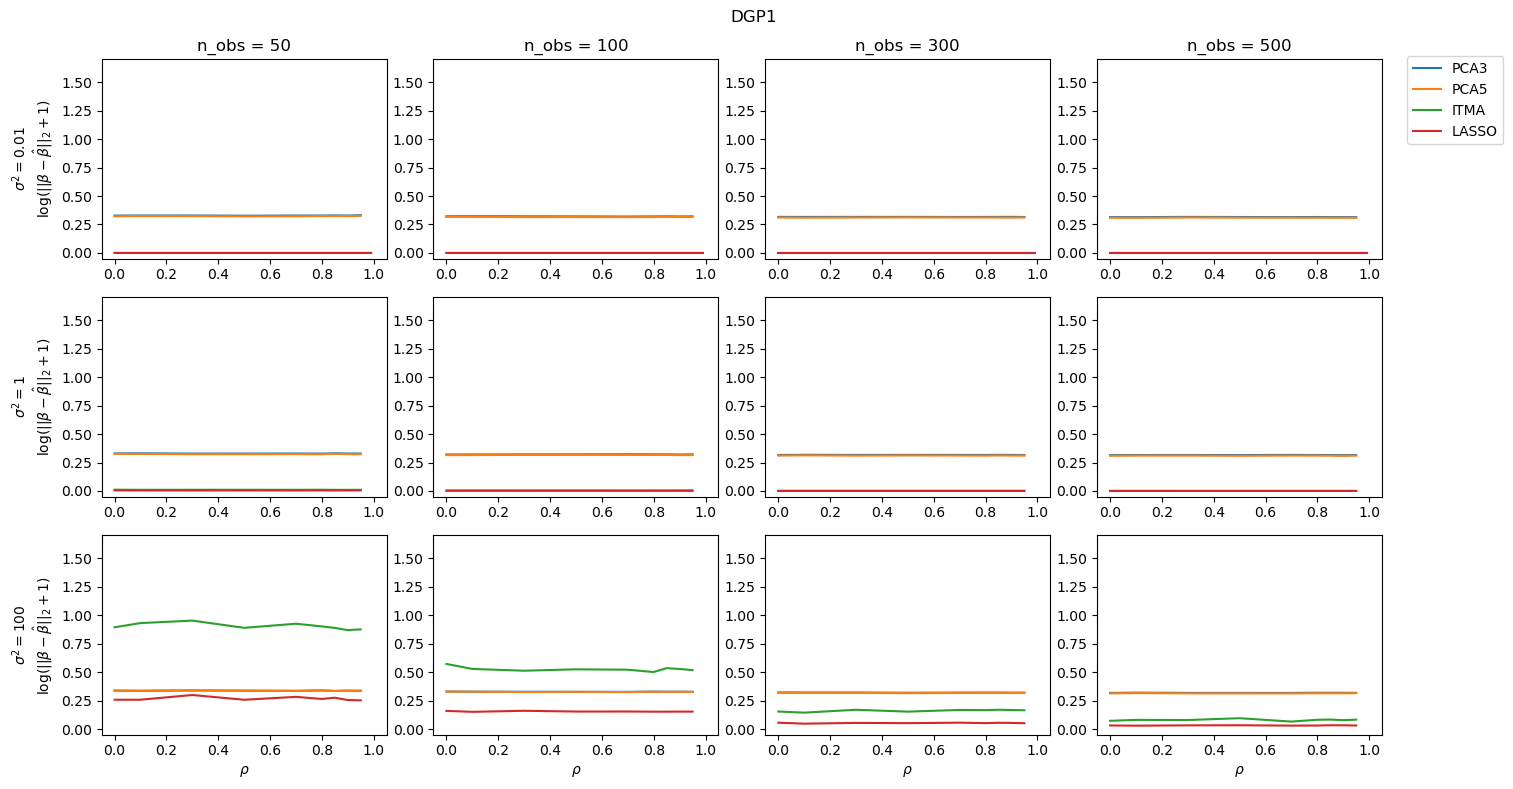

In [9]:
dgp = 'DGP1'

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 8))

setups = [[(n, v) for n in (50, 100, 300, 500)] for v in (0.01, 1, 100)]

for i in range(3):
    for j in range(4):
        ax = axs[i][j]
        n, var = setups[i][j]
        df = compare_df[(compare_df['Dataset'] == dgp) & (compare_df['err_var']==var) & (compare_df['n_obs'] == n)].copy()
        df['coef_diff'] = np.log(df['coef_diff_avg'] + 1)
        sns.lineplot(
            data=df,
            x = 'rho', y = 'coef_diff', hue='Model', ax=ax
        )
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_ylim((-0.05, 1.7))
        ax.set_xlim((-0.05, 1.05))
        if (i != 0) or (j != 3):
            ax.get_legend().remove()


axs[2][0].set_xlabel('$\\rho$')
axs[2][1].set_xlabel('$\\rho$')
axs[2][2].set_xlabel('$\\rho$')
axs[2][3].set_xlabel('$\\rho$')

axs[0][0].set_title('n_obs = 50')
axs[0][1].set_title('n_obs = 100')
axs[0][2].set_title('n_obs = 300')
axs[0][3].set_title('n_obs = 500')


axs[0][0].set_ylabel('$\\sigma^2 = 0.01$\n$\\log(||\\beta - \\hat{\\beta}||_2 + 1)$')
axs[1][0].set_ylabel('$\\sigma^2 = 1$\n$\\log(||\\beta - \\hat{\\beta}||_2 + 1)$')
axs[2][0].set_ylabel('$\\sigma^2 = 100$\n$\\log(||\\beta - \\hat{\\beta}||_2 + 1)$')

axs[0][3].legend(bbox_to_anchor=(1.45, 1.05))

fig.suptitle(dgp)
fig.tight_layout()

plt.savefig(f'../Plots/6_cmp_all_{dgp}_ceof_diff.pdf', bbox_inches='tight')


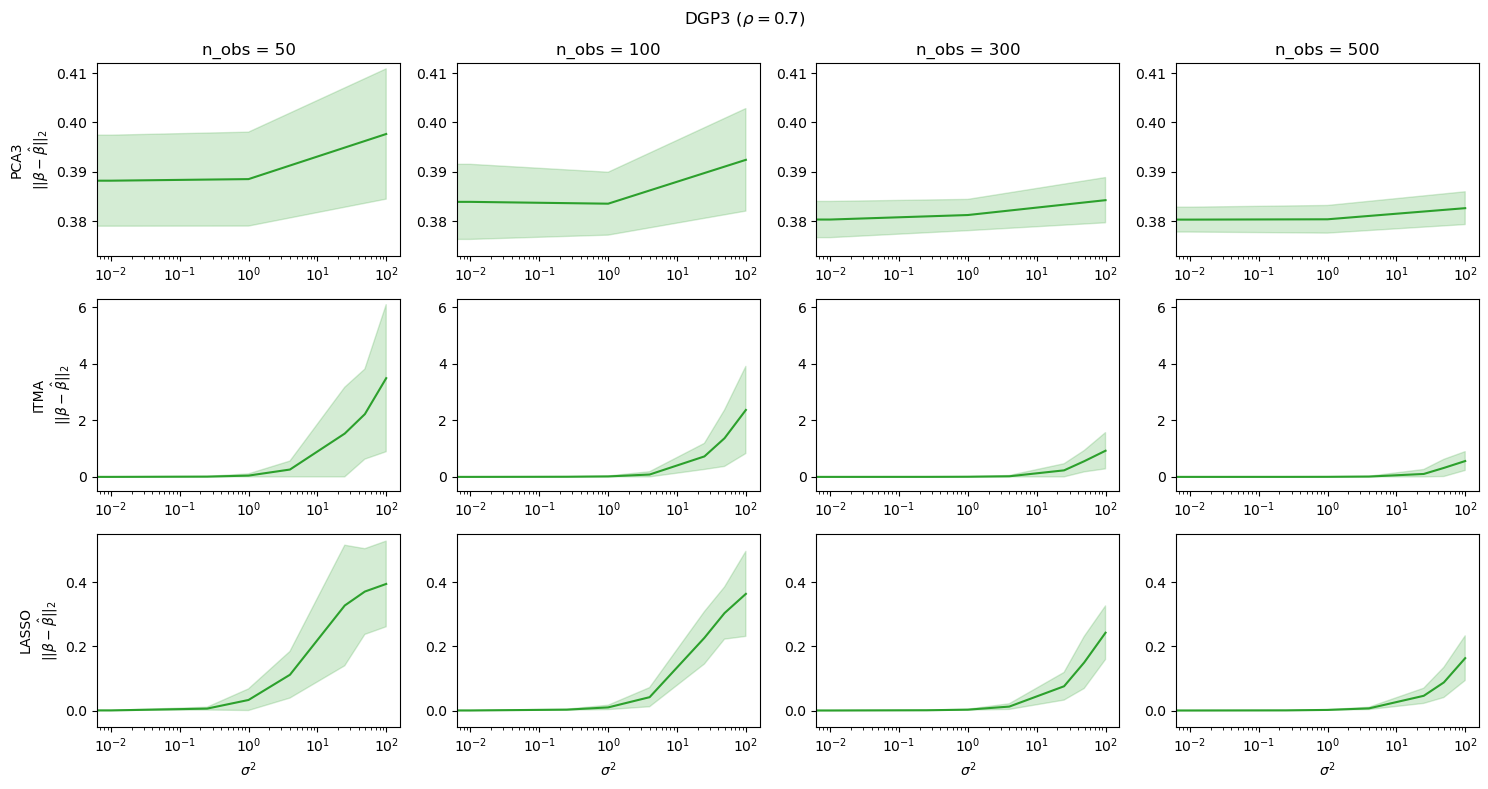

In [106]:
df = compare_df[(compare_df['rho'] == 0.7)].copy()
df['min'] = [max(0, s) for s in (df['coef_diff_avg'].values - np.sqrt(df['coef_diff_var'].values))]
df['max'] = [max(0, s) for s in (df['coef_diff_avg'].values + np.sqrt(df['coef_diff_var'].values))]

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 8))

setups = [[(n, mdl) for n in (50, 100, 300, 500)] for mdl in ('PCA3', 'ITMA', 'LASSO')]

for i in range(3):
    for j in range(4):
        ax = axs[i][j]
        n, mdl = setups[i][j]

        t_df = df[(df['Model'] == mdl) & (df['n_obs'] == n)].sort_values('err_var').copy()
        # df['coef_diff'] = np.log(df['coef_diff_avg'] + 1)
        
        # # DGP1 ________
        # tt_df = t_df[t_df['Dataset'] == 'DGP1'].copy()
        # ax.plot(tt_df['err_var'], tt_df['coef_diff_avg'], color='tab:blue', label='DGP1')
        # ax.fill_between(tt_df['err_var'], tt_df['min'], tt_df['max'], color='tab:blue', alpha=0.2, label='DGP1')

        # # DGP2 ________
        # tt_df = t_df[t_df['Dataset'] == 'DGP2'].copy()
        # ax.plot(tt_df['err_var'], tt_df['coef_diff_avg'], color='tab:orange', label='DGP2')
        # ax.fill_between(tt_df['err_var'], tt_df['min'], tt_df['max'], color='tab:orange', alpha=0.2, label='DGP2')
        

        # DGP3 ________
        tt_df = t_df[t_df['Dataset'] == 'DGP3'].copy()
        ax.plot(tt_df['err_var'], tt_df['coef_diff_avg'], color='tab:green', label='DGP3')
        ax.fill_between(tt_df['err_var'], tt_df['min'], tt_df['max'], color='tab:green', alpha=0.2, label='DGP3')
        
        ax.set_xscale('log')

        # ax.set_xticklabels([1, 2, 3, 4], ['50', '100', '300', '500'])

        ax.set_xlabel('')
        ax.set_ylabel('')

        if i == 0:
            ax.set_ylim((0.373, 0.412))
        elif i == 1:
            ax.set_ylim((-.5, 6.3))
        else:
            ax.set_ylim((-.05, 0.55))

        if i == 0:
            ax.set_title(f'n_obs = {(50, 100, 300, 500)[j]}')
        
        if i == 2:
            ax.set_xlabel('$\\sigma^2$')
        
        if j == 0:
            ax.set_ylabel(f"{('PCA3', 'ITMA', 'LASSO')[i]}\n" + "$||\\beta-\\hat{\\beta}||_2$")


fig.suptitle('DGP3 ($\\rho=0.7$)')
fig.tight_layout()

plt.savefig('../Plots/6_cmb_n_dgp3.pdf', bbox_inches = 'tight')

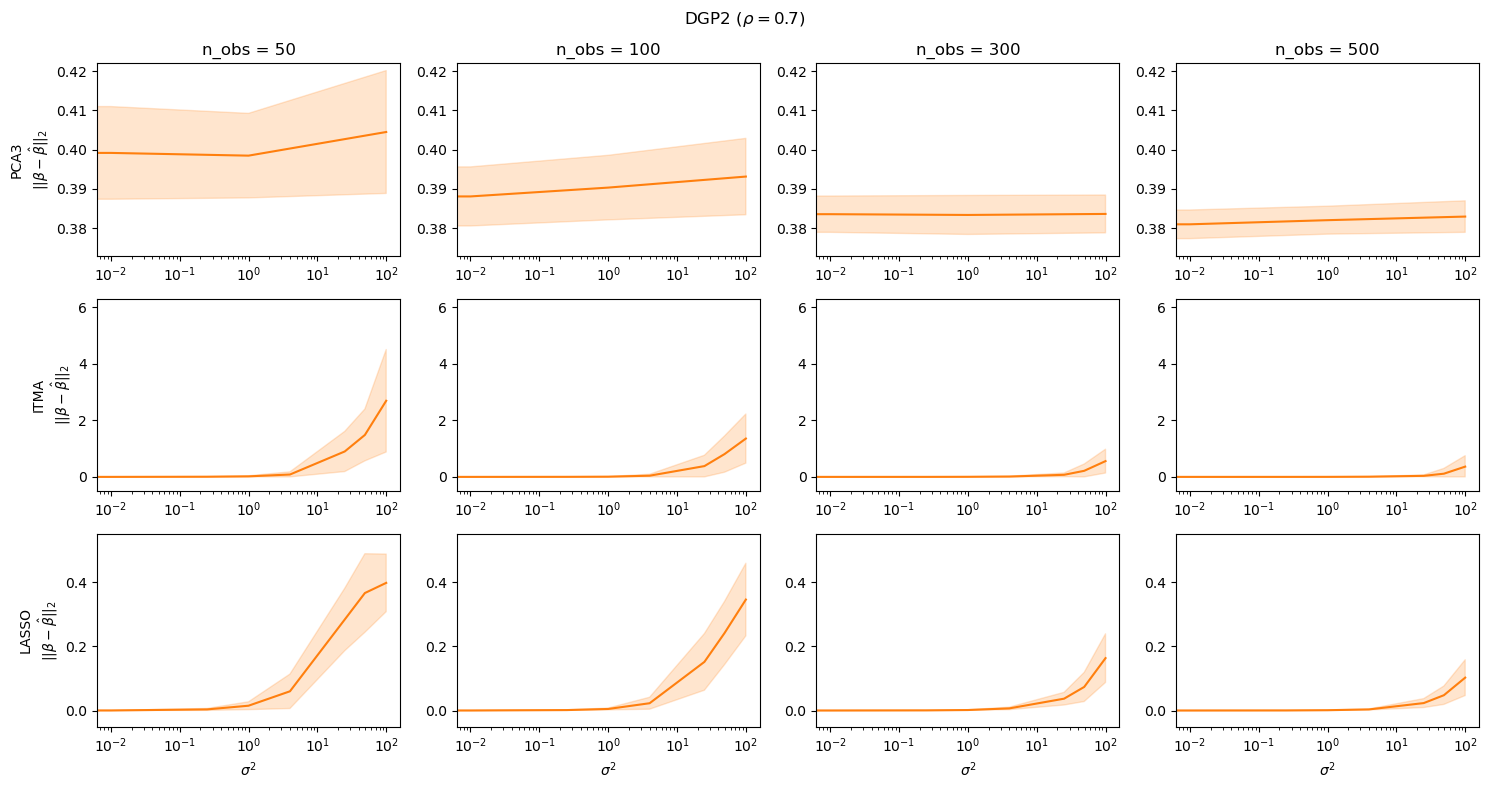

In [107]:
df = compare_df[(compare_df['rho'] == 0.7)].copy()
df['min'] = [max(0, s) for s in (df['coef_diff_avg'].values - np.sqrt(df['coef_diff_var'].values))]
df['max'] = [max(0, s) for s in (df['coef_diff_avg'].values + np.sqrt(df['coef_diff_var'].values))]

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 8))

setups = [[(n, mdl) for n in (50, 100, 300, 500)] for mdl in ('PCA3', 'ITMA', 'LASSO')]

for i in range(3):
    for j in range(4):
        ax = axs[i][j]
        n, mdl = setups[i][j]

        t_df = df[(df['Model'] == mdl) & (df['n_obs'] == n)].sort_values('err_var').copy()
        # df['coef_diff'] = np.log(df['coef_diff_avg'] + 1)
        
        # # DGP1 ________
        # tt_df = t_df[t_df['Dataset'] == 'DGP1'].copy()
        # ax.plot(tt_df['err_var'], tt_df['coef_diff_avg'], color='tab:blue', label='DGP1')
        # ax.fill_between(tt_df['err_var'], tt_df['min'], tt_df['max'], color='tab:blue', alpha=0.2, label='DGP1')

        # DGP2 ________
        tt_df = t_df[t_df['Dataset'] == 'DGP2'].copy()
        ax.plot(tt_df['err_var'], tt_df['coef_diff_avg'], color='tab:orange', label='DGP2')
        ax.fill_between(tt_df['err_var'], tt_df['min'], tt_df['max'], color='tab:orange', alpha=0.2, label='DGP2')
        

        # # DGP3 ________
        # tt_df = t_df[t_df['Dataset'] == 'DGP3'].copy()
        # ax.plot(tt_df['err_var'], tt_df['coef_diff_avg'], color='tab:green', label='DGP3')
        # ax.fill_between(tt_df['err_var'], tt_df['min'], tt_df['max'], color='tab:green', alpha=0.2, label='DGP3')
        
        ax.set_xscale('log')

        # ax.set_xticklabels([1, 2, 3, 4], ['50', '100', '300', '500'])

        ax.set_xlabel('')
        ax.set_ylabel('')

        if i == 0:
            ax.set_ylim((0.373, 0.422))
        elif i == 1:
            ax.set_ylim((-.5, 6.3))
        else:
            ax.set_ylim((-.05, 0.55))

        if i == 0:
            ax.set_title(f'n_obs = {(50, 100, 300, 500)[j]}')
        
        if i == 2:
            ax.set_xlabel('$\\sigma^2$')
        
        if j == 0:
            ax.set_ylabel(f"{('PCA3', 'ITMA', 'LASSO')[i]}\n" + "$||\\beta-\\hat{\\beta}||_2$")


fig.suptitle('DGP2 ($\\rho=0.7$)')
fig.tight_layout()

plt.savefig('../Plots/6_cmb_n_dgp2.pdf', bbox_inches = 'tight')

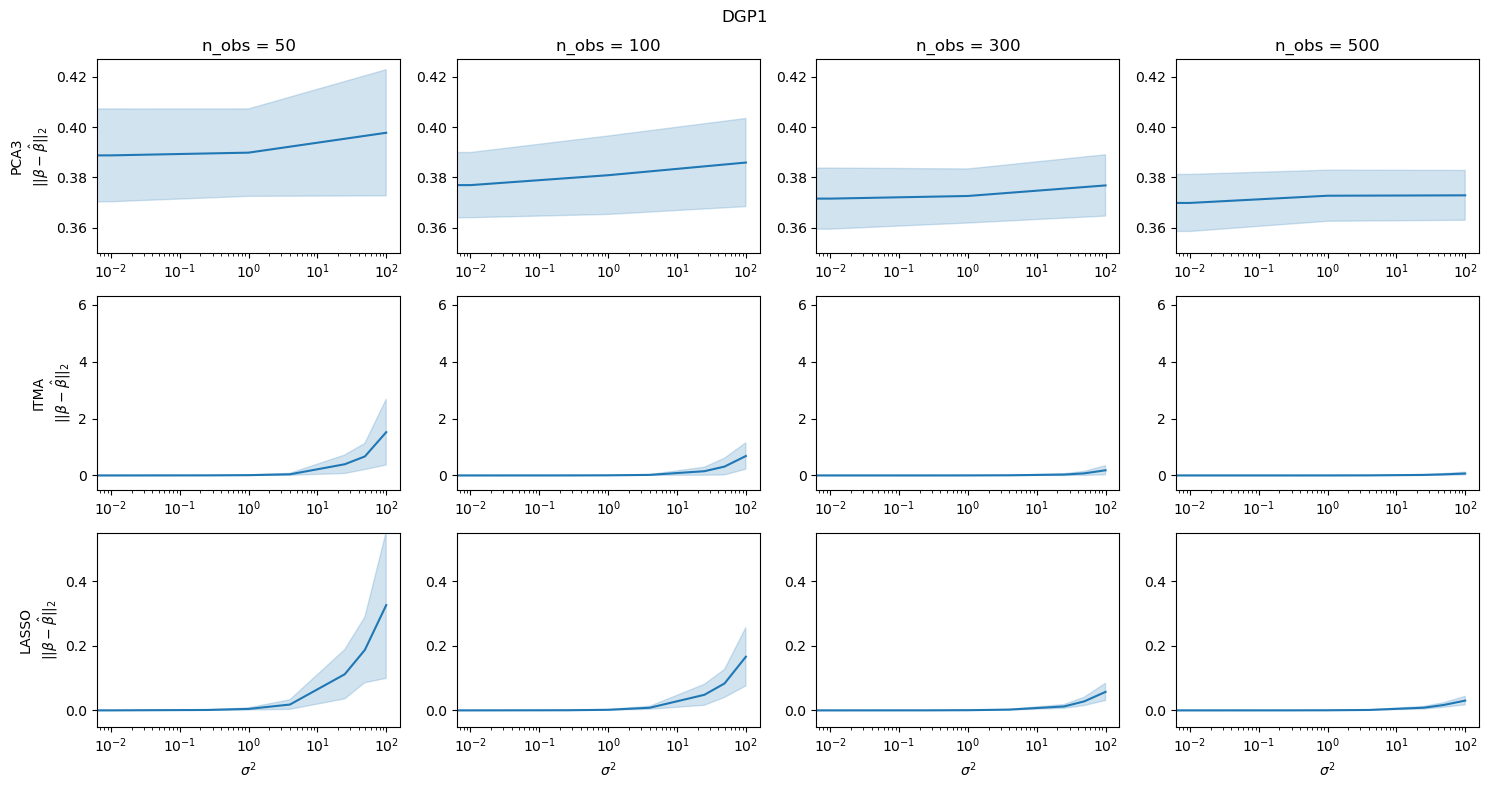

In [109]:
df = compare_df[(compare_df['rho'] == 0.7)].copy()
df['min'] = [max(0, s) for s in (df['coef_diff_avg'].values - np.sqrt(df['coef_diff_var'].values))]
df['max'] = [max(0, s) for s in (df['coef_diff_avg'].values + np.sqrt(df['coef_diff_var'].values))]

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 8))

setups = [[(n, mdl) for n in (50, 100, 300, 500)] for mdl in ('PCA3', 'ITMA', 'LASSO')]

for i in range(3):
    for j in range(4):
        ax = axs[i][j]
        n, mdl = setups[i][j]

        t_df = df[(df['Model'] == mdl) & (df['n_obs'] == n)].sort_values('err_var').copy()
        # df['coef_diff'] = np.log(df['coef_diff_avg'] + 1)
        
        # DGP1 ________
        tt_df = t_df[t_df['Dataset'] == 'DGP1'].copy()
        ax.plot(tt_df['err_var'], tt_df['coef_diff_avg'], color='tab:blue', label='DGP1')
        ax.fill_between(tt_df['err_var'], tt_df['min'], tt_df['max'], color='tab:blue', alpha=0.2, label='DGP1')

        # # DGP2 ________
        # tt_df = t_df[t_df['Dataset'] == 'DGP2'].copy()
        # ax.plot(tt_df['err_var'], tt_df['coef_diff_avg'], color='tab:orange', label='DGP2')
        # ax.fill_between(tt_df['err_var'], tt_df['min'], tt_df['max'], color='tab:orange', alpha=0.2, label='DGP2')
        

        # # DGP3 ________
        # tt_df = t_df[t_df['Dataset'] == 'DGP3'].copy()
        # ax.plot(tt_df['err_var'], tt_df['coef_diff_avg'], color='tab:green', label='DGP3')
        # ax.fill_between(tt_df['err_var'], tt_df['min'], tt_df['max'], color='tab:green', alpha=0.2, label='DGP3')
        
        ax.set_xscale('log')

        # ax.set_xticklabels([1, 2, 3, 4], ['50', '100', '300', '500'])

        ax.set_xlabel('')
        ax.set_ylabel('')

        if i == 0:
            ax.set_ylim((0.35, 0.427))
        elif i == 1:
            ax.set_ylim((-.5, 6.3))
        else:
            ax.set_ylim((-.05, 0.55))

        if i == 0:
            ax.set_title(f'n_obs = {(50, 100, 300, 500)[j]}')
        
        if i == 2:
            ax.set_xlabel('$\\sigma^2$')
        
        if j == 0:
            ax.set_ylabel(f"{('PCA3', 'ITMA', 'LASSO')[i]}\n" + "$||\\beta-\\hat{\\beta}||_2$")


fig.suptitle('DGP1')
fig.tight_layout()

plt.savefig('../Plots/6_cmb_n_dgp1.pdf', bbox_inches = 'tight')